# Contexto del problema

El contexto describe la geografía y el clima de Australia,
este País tiene una gran diversidad climática que va desde el clima tropical en el norte, hasta clima templado en el sur-este y Tasmania.

Aquí la mayor parte del territorio es árido y semiárido, donde la población se concentra en zonas urbanas.

Como dato Australia es un continente seco después de la Antártida, en este lugar se dan distintos tipos de fenómenos naturales como sequías, inundaciones, ciclones tropicales, vientos violentos e incendios forestales.

# Carga de datos

##Libreria

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode , multimode , median
import math
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
%matplotlib inline
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn import tree
from datetime import timedelta


##Datos

In [1]:
!wget https://www.dropbox.com/s/n4mdkqfl05mm4d7/weatherAUS.csv
data_frame=pd.read_csv('weatherAUS.csv',sep=",")

--2026-01-08 15:40:34--  https://www.dropbox.com/s/n4mdkqfl05mm4d7/weatherAUS.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/zmphe6q8iyz5gs4rsdi5y/weatherAUS.csv?rlkey=2a2idfu3m9p054q5e91y4y3l1 [following]
--2026-01-08 15:40:34--  https://www.dropbox.com/scl/fi/zmphe6q8iyz5gs4rsdi5y/weatherAUS.csv?rlkey=2a2idfu3m9p054q5e91y4y3l1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5a1f95399b4ca7aa41c2873a3d.dl.dropboxusercontent.com/cd/0/inline/C4lqO3g2eFJ6Zqf0Xs3L3vCa03BIRUN5Jvz_uO82fX1gXjG2h3WTnGHQdmQEQbOynmZvkFzi0SRLBhgDvPNRwpAn5NoZkcIYUxqx5Z29hO_MujleDFhu8ARwjWaGLtGWeA_WI18whGn7cJPK4DNhcfeH/file# [following]
--2026-01-08 15:40:34--  https://uc5a1f95399b4ca7aa41c2873a3d.dl.dropboxusercontent.com/cd/0/in

NameError: name 'pd' is not defined

# Limpieza y transformación de datos

##Limpieza


Primero vamos a analizar la cantidad de nulos por columna de la tabla

In [ ]:
data_frame.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

A los que tienen una cantidad de nulos mayor a 0 le vamos a realizar limpieza ,pero primero tenemos que saber que tipo de variable son para poder aplicar un tipo de limpieza

In [ ]:
data_frame.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

A los valores tipo object le remplazaremos los nulos por la moda y a los tipo float64 los cambiaremos por la mediana o por el promedio dependiendo si cuenta o no con outliers

###Limpieza de la variable MinTemp

Text(0.5, 1.0, 'Outliers Temperatura Minima')

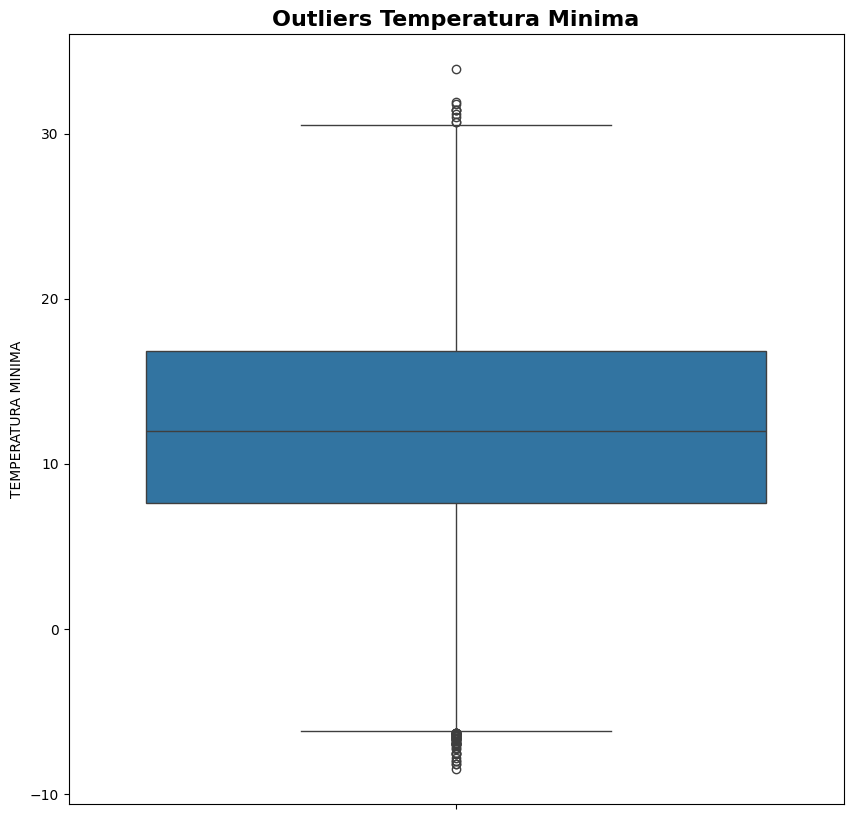

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.MinTemp,data=data_frame)
plt.ylabel("TEMPERATURA MINIMA")
plt.title("Outliers Temperatura Minima",fontsize=16, fontweight="bold")

Esta variable cuenta con outliers lo cual se procederá a cambiarla por la mediana

In [ ]:
median = data_frame.MinTemp.median()
print("mediana:",median)
data_frame.MinTemp=data_frame.MinTemp.fillna(median)
print("La cantidad de nulos ahora es: ",data_frame.MinTemp.isnull().sum())

mediana: 12.0
La cantidad de nulos ahora es:  0


###Limpieza variable MaxTemp

Text(0.5, 1.0, 'Outliers Temperatura maxima')

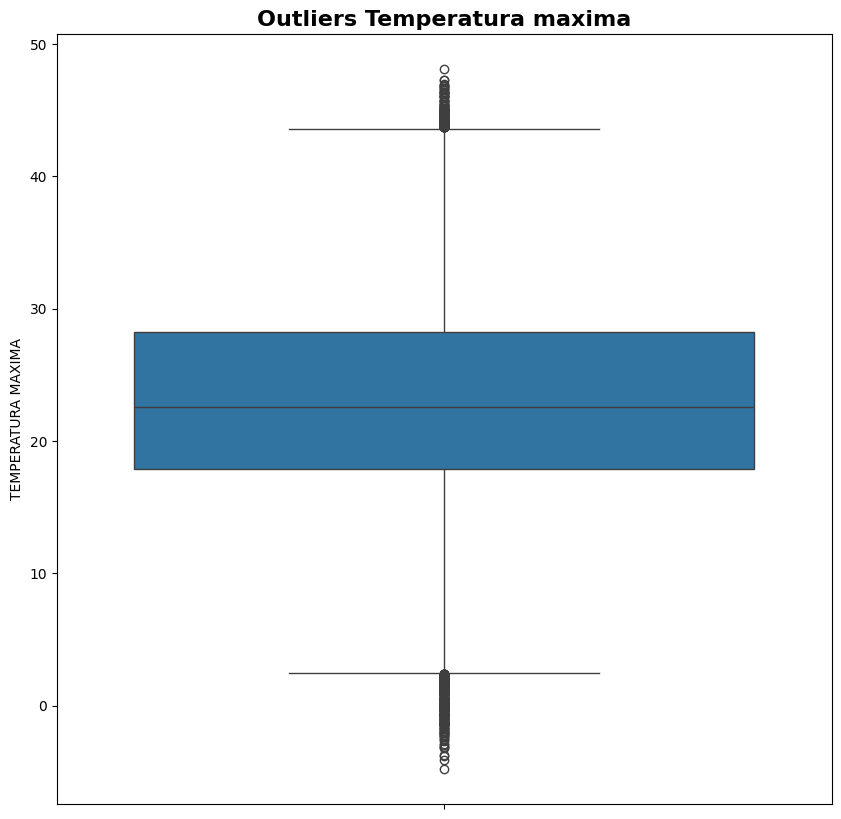

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.MaxTemp,data=data_frame)
plt.ylabel("TEMPERATURA MAXIMA")
plt.title("Outliers Temperatura maxima",fontsize=16, fontweight="bold")

La variable cuenta con valores outliers lo cual se procederá a cambarse por la mediana

In [ ]:
median = data_frame.MaxTemp.median()
print("mediana:",median)
data_frame.MaxTemp=data_frame.MaxTemp.fillna(median)
print("La cantidad ahora de nulos es: ",  data_frame.MaxTemp.isnull().sum())

mediana: 22.6
La cantidad ahora de nulos es:  0


###Limpieza variable Rainfall


Text(0.5, 1.0, 'Outliers mm de agua caida')

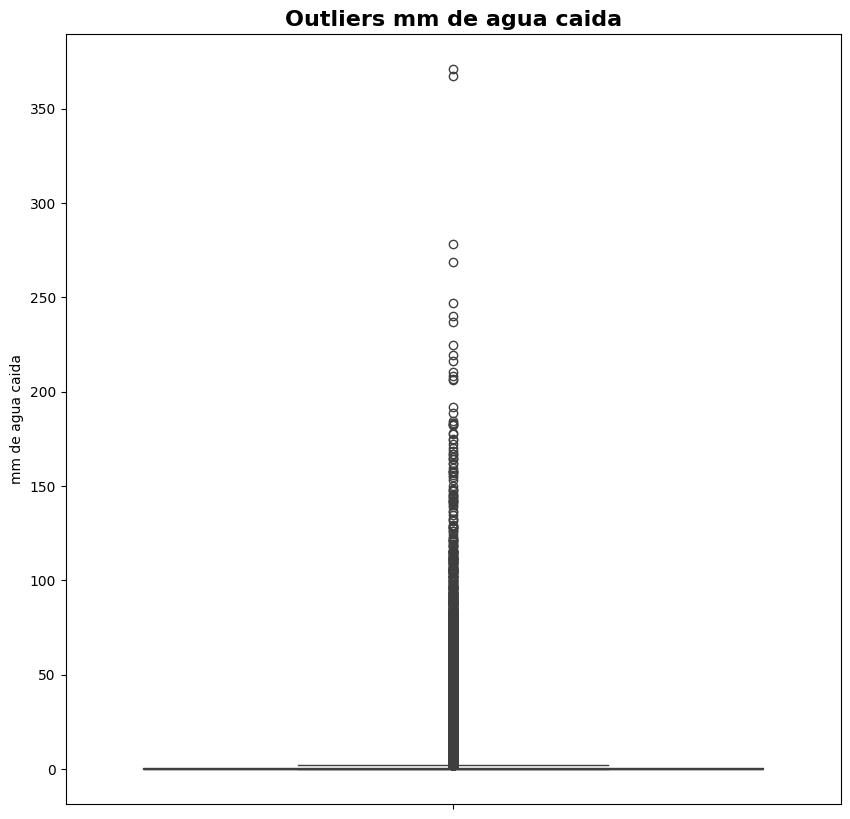

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Rainfall,data=data_frame)
plt.ylabel("mm de agua caida")
plt.title("Outliers mm de agua caida",fontsize=16, fontweight="bold")

La variable cuenta con outliers lo cual se procederá a sacar la mediana y remplazarla por los nulos.

In [ ]:
median = data_frame.Rainfall.median()
print("mediana:",median)
data_frame.Rainfall=data_frame.Rainfall.fillna(median)
print("La cantidad de nulos ahora es:",data_frame.Rainfall.isnull().sum())

mediana: 0.0
La cantidad de nulos ahora es: 0


###Limpieza variable Evaporation

Text(0.5, 1.0, 'Outliers mm de agua evaporada')

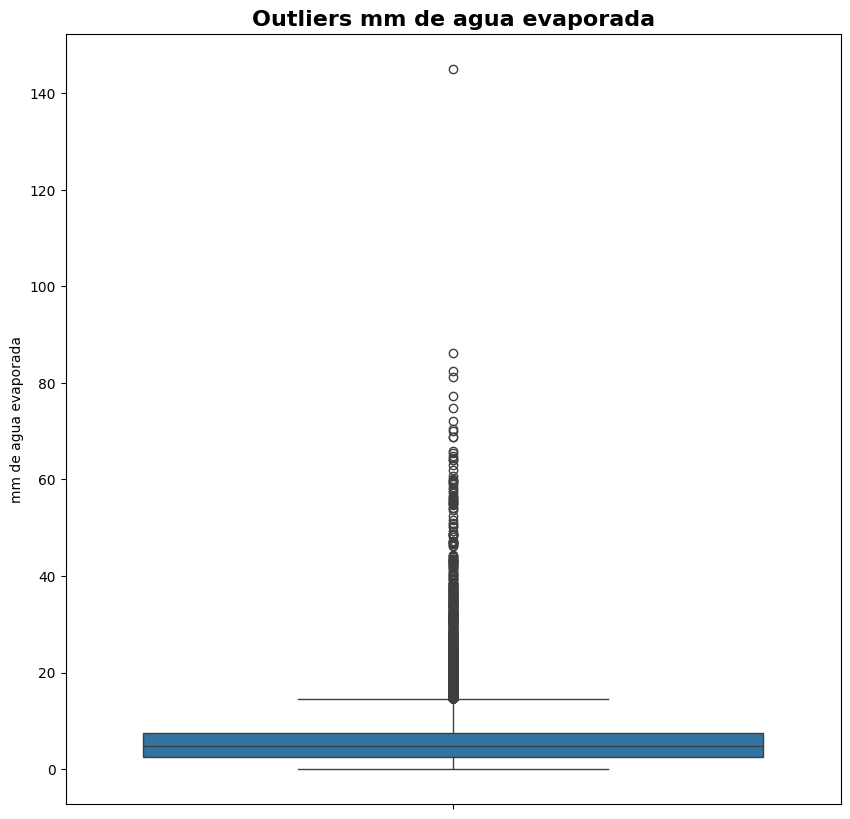

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Evaporation,data=data_frame)
plt.ylabel("mm de agua evaporada")
plt.title("Outliers mm de agua evaporada",fontsize=16, fontweight="bold")

La variable cuenta con outliers lo cual se procederá cambiar los nulos por la mediana

In [ ]:
median = data_frame.Evaporation.median()
print("la mediana es:",median)
data_frame.Evaporation=data_frame.Evaporation.fillna(median)
print("La cantidad de nulos ahora es:",data_frame.Evaporation.isnull().sum())

la mediana es: 4.8
La cantidad de nulos ahora es: 0


###Limpieza variable Sunshine

Text(0.5, 1.0, 'Outliers N° de horas que el sol brilló')

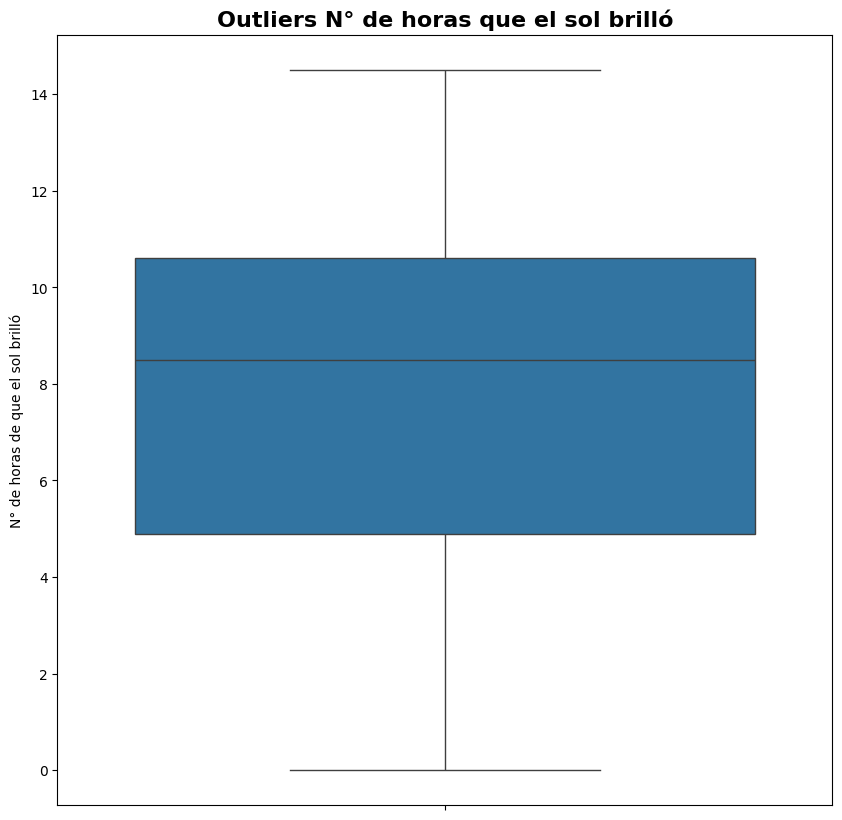

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Sunshine,data=data_frame)
plt.ylabel("N° de horas de que el sol brilló")
plt.title("Outliers N° de horas que el sol brilló",fontsize=16, fontweight="bold")

La variable no cuenta con outliers lo cual se procederá a cambiar por el promedio

In [ ]:
mean = data_frame.Sunshine.mean()
print("Promedio:",mean)
data_frame.Sunshine=data_frame.Sunshine.fillna(mean)
print("La cantidad de nulo ahora es:",data_frame.Sunshine.isnull().sum())

Promedio: 7.624853113193594
La cantidad de nulo ahora es: 0


###Limpieza variable WindGustDir

Como es una variable cualitativa se reemplazará los nulos por la moda




In [ ]:
data_frame.WindGustDir.describe()

count     132863
unique        16
top            W
freq        9780
Name: WindGustDir, dtype: object

In [ ]:
moda=data_frame.WindGustDir.mode()[0]
print("la moda es: ",moda)
data_frame.WindGustDir=data_frame.WindGustDir.fillna(str(mode))
print("Cantidad de nulos de la columna WindGustDir: ",data_frame.WindGustDir.isnull().sum())

la moda es:  W
Cantidad de nulos de la columna WindGustDir:  0


###Limpieza variable WindGustSpeed

Text(0.5, 1.0, 'Outliers velocidad del viento en km/h')

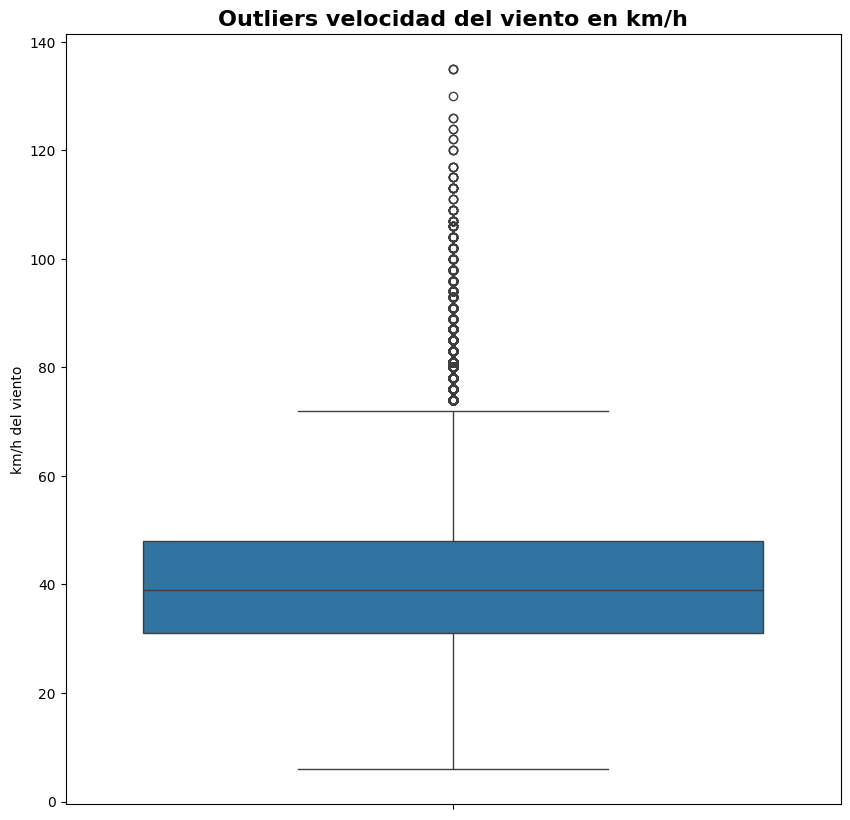

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.WindGustSpeed,data=data_frame)
plt.ylabel("km/h del viento")
plt.title("Outliers velocidad del viento en km/h",fontsize=16, fontweight="bold")

El gráfico cuenta con valores outliers, lo cual se cambiará los valores nulos por la mediana

In [ ]:
median = data_frame.WindGustSpeed.median()
print("la mediana es:",median)
data_frame.WindGustSpeed=data_frame.WindGustSpeed.fillna(median)
print("Cantidad de nulos de la columna WindGustSpeed: ",data_frame.WindGustSpeed.isnull().sum())

la mediana es: 39.0
Cantidad de nulos de la columna WindGustSpeed:  0


###Limpieza variable WindDir9am

Como es una variable cualitativa se reemplazará los nulos por la moda

In [ ]:
data_frame.WindDir9am.describe()

count     132180
unique        16
top            N
freq       11393
Name: WindDir9am, dtype: object

La moda es N lo cual se reemplazará los nulos por este valor

In [ ]:
moda=data_frame.WindDir9am.mode()[0]
data_frame.WindDir9am=data_frame.WindDir9am.fillna(str(mode))
print("Cantidad de nulos de la columna WindDir9am: ",data_frame.WindDir9am.isnull().sum())

Cantidad de nulos de la columna WindDir9am:  0


###Limpieza variable WindDir3pm

Como es una variable cualitativa se reemplazará los nulos por la moda



In [ ]:
data_frame.WindDir3pm.describe()

count     138415
unique        16
top           SE
freq       10663
Name: WindDir3pm, dtype: object

La moda es SE lo cual se reemplazará los nulos por este valor

In [ ]:
moda=data_frame.WindDir3pm.mode()[0]
data_frame.WindDir3pm=data_frame.WindDir3pm.fillna(str(mode))
print("Cantidad de nulos de la columna WindDir3pm: ",data_frame.WindDir3pm.isnull().sum())

Cantidad de nulos de la columna WindDir3pm:  0


###Limpieza variable WindSpeed9am

Text(0.5, 1.0, 'Outliers velocidad del viento en km/h a las 9AM')

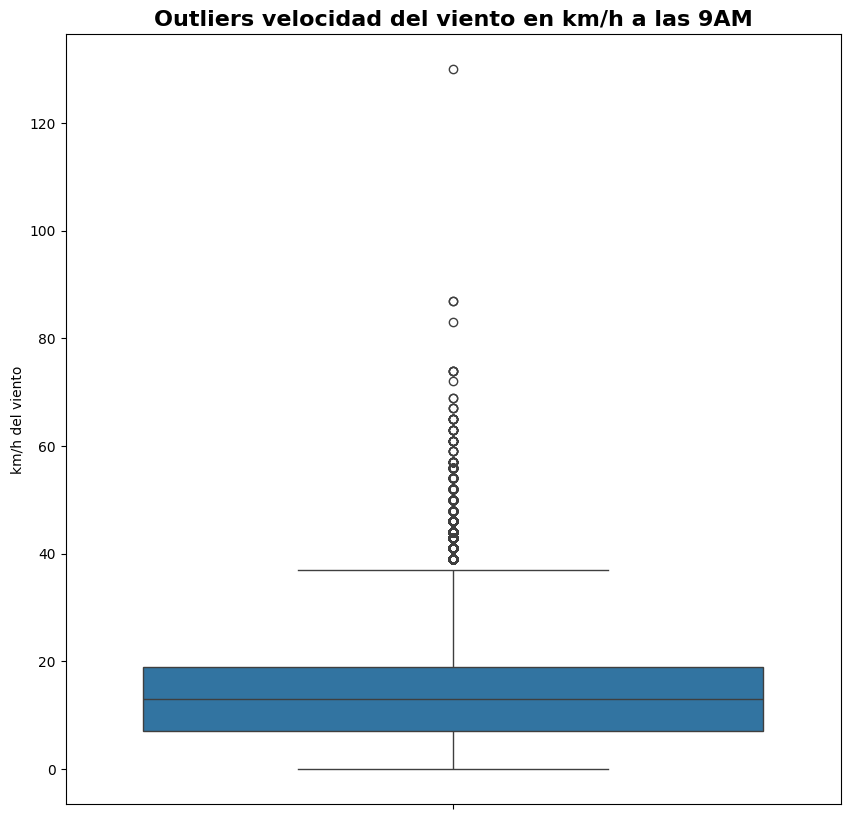

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.WindSpeed9am,data=data_frame)
plt.ylabel("km/h del viento")
plt.title("Outliers velocidad del viento en km/h a las 9AM",fontsize=16, fontweight="bold")

La columna muestra con valores outliers lo cual en el tratamiento de la variable a los valores nulos le asignaremos el valor de la mediana

In [ ]:
median = data_frame.WindSpeed9am.median()
print("la mediana es:",median)
data_frame.WindSpeed9am=data_frame.WindSpeed9am.fillna(median)
print("Cantidad de nulos de la columna WindSpeed9am: ",data_frame.WindSpeed9am.isnull().sum())

la mediana es: 13.0
Cantidad de nulos de la columna WindSpeed9am:  0


###Limpieza variable WindSpeed3pm

Text(0.5, 1.0, 'Outliers velocidad del viento en km/h a las 3PM')

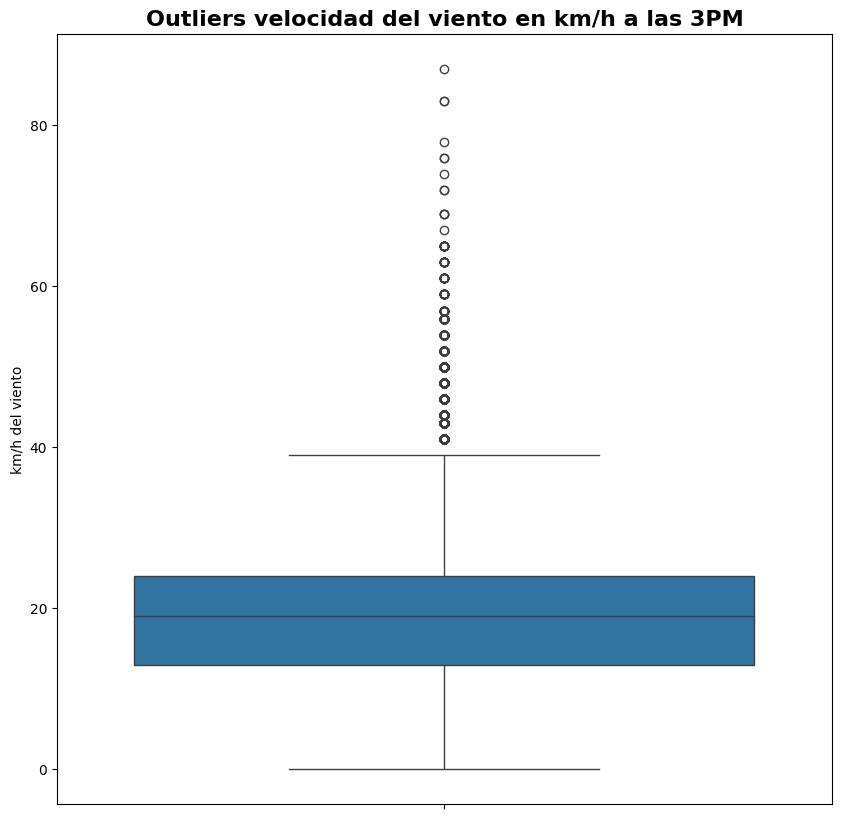

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.WindSpeed3pm,data=data_frame)
plt.ylabel("km/h del viento")
plt.title("Outliers velocidad del viento en km/h a las 3PM",fontsize=16, fontweight="bold")

El gráfico muentra que la columna WindSpeed3pm cuenta con outliers lo cual a los valores nulos se le asignará el valor de la mediana

In [ ]:
median = data_frame.WindSpeed3pm.median()
print("la mediana es:",median)
data_frame.WindSpeed3pm=data_frame.WindSpeed3pm.fillna(str(median))
print("Cantidad de nulos de la columna WindGustSpeed3pm es:",data_frame.WindSpeed3pm.isnull().sum())

la mediana es: 19.0
Cantidad de nulos de la columna WindGustSpeed3pm es: 0


###Limpieza variable Humidity9am

Text(0.5, 1.0, 'Outliers porcentaje de humedad a las 9AM')

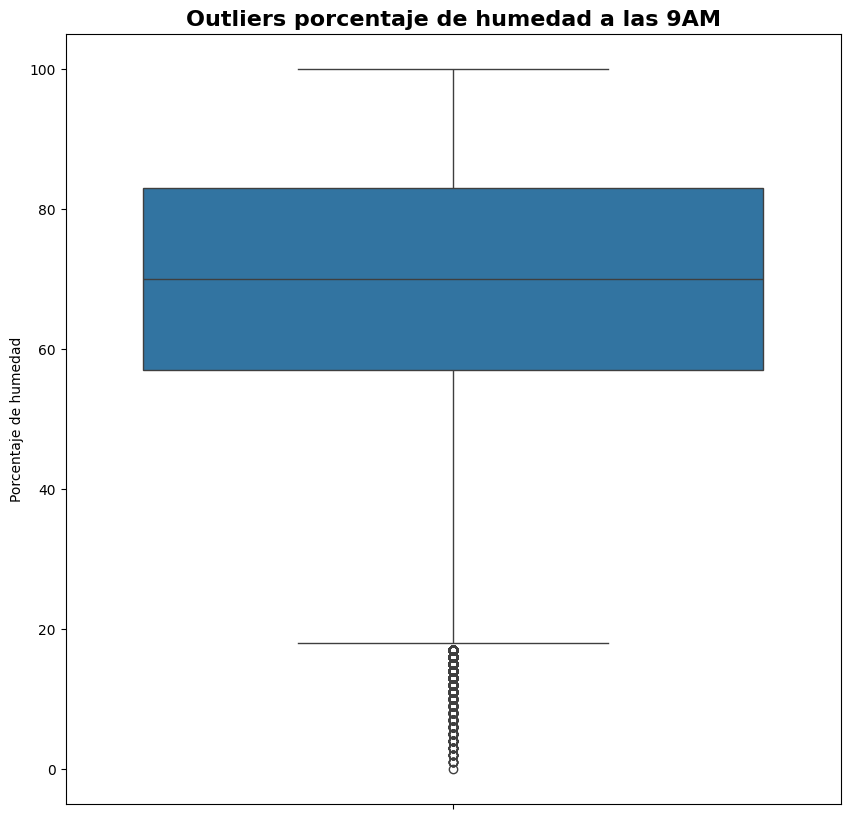

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Humidity9am,data=data_frame)
plt.ylabel("Porcentaje de humedad")
plt.title("Outliers porcentaje de humedad a las 9AM",fontsize=16, fontweight="bold")

El gráfico muestra que la columna Humidity9am cuenta con valores outliers

In [ ]:
median = data_frame.Humidity9am.median()
print("la mediana es:",median)
data_frame.Humidity9am=data_frame.Humidity9am.fillna(median)
print("Cantidad de nulos de la columna Humidity9am es:",data_frame.Humidity9am.isnull().sum())

la mediana es: 70.0
Cantidad de nulos de la columna Humidity9am es: 0


###Limpieza Humidity3pm

Text(0.5, 1.0, 'Outliers porcentaje de humedad a las 3PM')

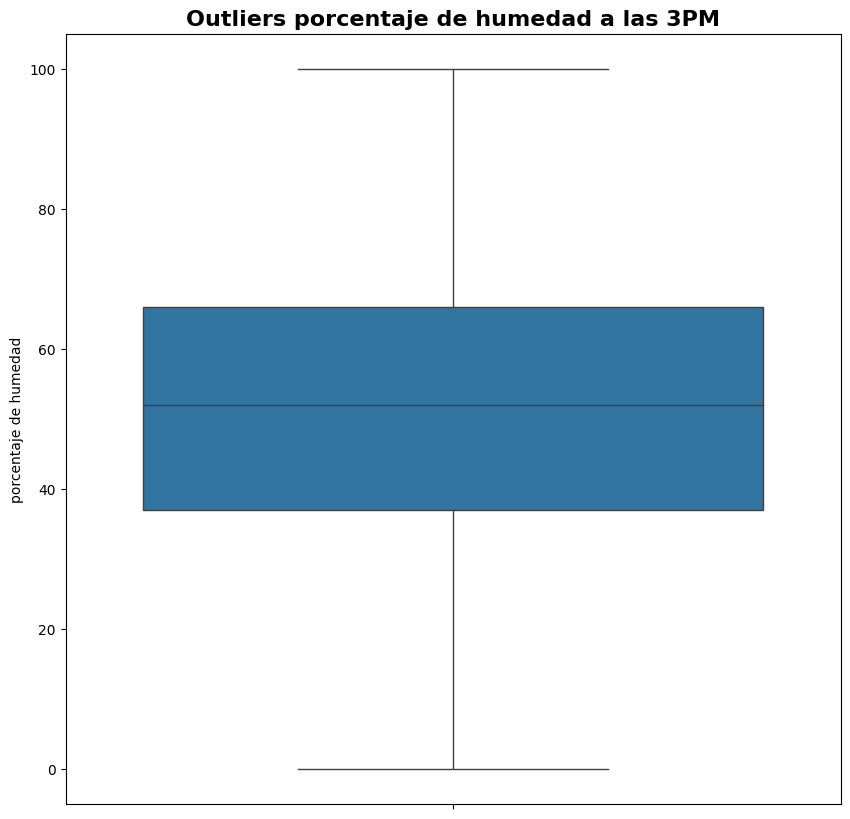

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Humidity3pm,data=data_frame)
plt.ylabel("porcentaje de humedad")
plt.title("Outliers porcentaje de humedad a las 3PM",fontsize=16, fontweight="bold")

El gráfico muestra que no existe existencia de outliers lo cual se realizará cambiar valores nulos por el promedio

In [ ]:
mean = data_frame.Humidity3pm.mean()
print("el promedio es:",mean)
data_frame.Humidity3pm=data_frame.Humidity3pm.fillna(mean)
print("Cantidad de nulos de la columna Humidity3pm: ",data_frame.Humidity3pm.isnull().sum())

el promedio es: 51.482606091656265
Cantidad de nulos de la columna Humidity3pm:  0


###Limpieza variable Pressure9am

Text(0.5, 1.0, 'Outliers HPA a nivel del mar a las 9AM')

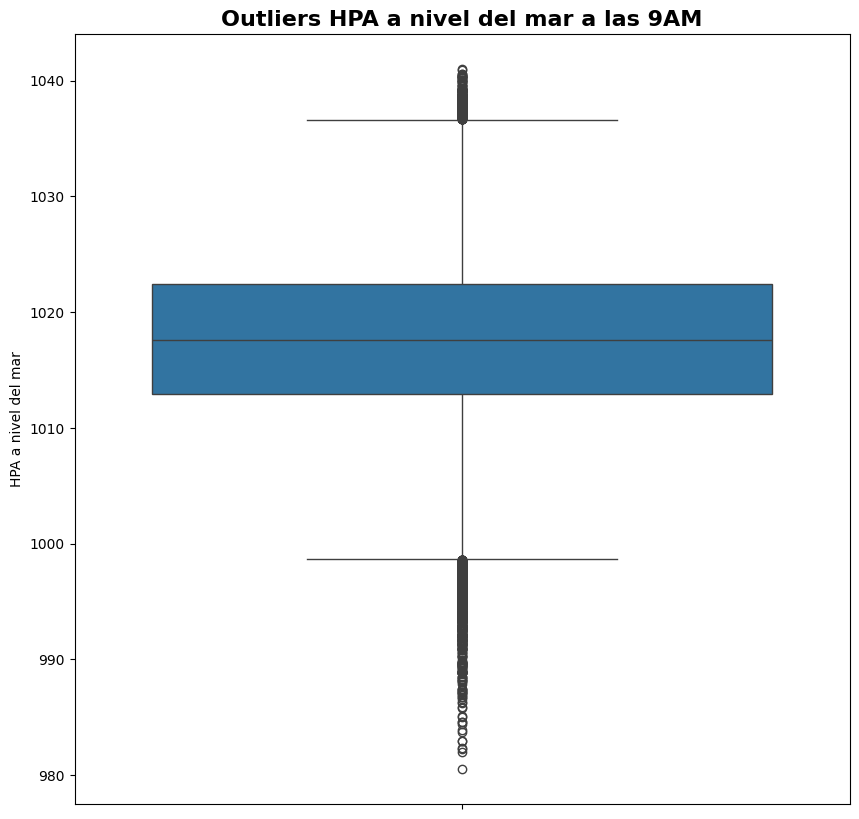

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Pressure9am,data=data_frame)
plt.ylabel("HPA a nivel del mar")
plt.title("Outliers HPA a nivel del mar a las 9AM",fontsize=16, fontweight="bold")

Como presenta valores outliers se realizará es cambiar los valores nulos a la mediana de la columna Pressure9am



In [ ]:
median = data_frame.Pressure9am.median()
print("la mediana es:",median)
data_frame.Pressure9am=data_frame.Pressure9am.fillna(mean)
print("Cantidad de nulos de la columna Pressure9am: ",data_frame.Pressure9am.isnull().sum())

la mediana es: 1017.6
Cantidad de nulos de la columna Pressure9am:  0


###Limpieza variable Pressure3pm

Text(0.5, 1.0, 'Outliers HPA a nivel del mar a las 3PM')

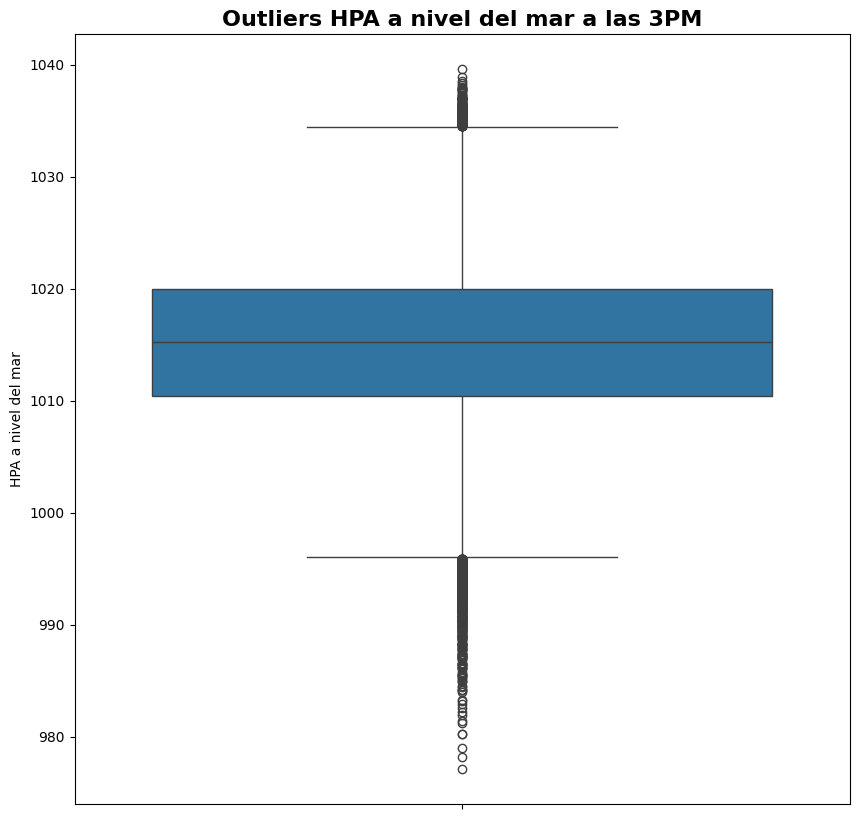

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Pressure3pm,data=data_frame)
plt.ylabel("HPA a nivel del mar")
plt.title("Outliers HPA a nivel del mar a las 3PM",fontsize=16, fontweight="bold")

El gráfico muestra valores outliers, lo cual se procederá a cambiar los valores nulos por la mediana

In [ ]:
median = data_frame.Pressure3pm.median()
print("la mediana es:",median)
data_frame.Pressure3pm=data_frame.Pressure3pm.fillna(mean)
print("Cantidad de nulos de la columna Pressure3pm: ",data_frame.Pressure9am.isnull().sum())

la mediana es: 1015.2
Cantidad de nulos de la columna Pressure3pm:  0


###Limpieza de variable Cloud9am

Text(0.5, 1.0, 'Outliers Fracción del cielo cubierto en octavos a las 9AM')

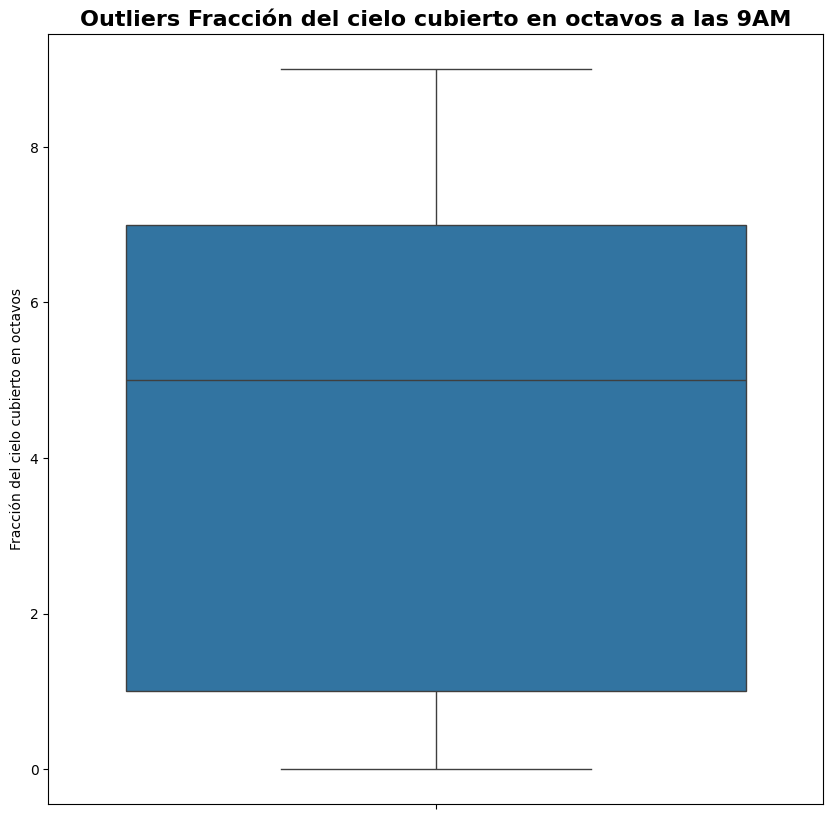

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Cloud9am,data=data_frame)
plt.ylabel("Fracción del cielo cubierto en octavos")
plt.title("Outliers Fracción del cielo cubierto en octavos a las 9AM",fontsize=16, fontweight="bold")

El gráfico no presenta valores outliers, lo cual se procederá a cambiar por el promedio.

In [ ]:
mean = data_frame.Cloud9am.mean()
print("el promedio es:",mean)
data_frame.Cloud9am=data_frame.Cloud9am.fillna(mean)
print("Cantidad de nulos de la columna Cloud9am: ",data_frame.Cloud9am.isnull().sum())

el promedio es: 4.437189391885787
Cantidad de nulos de la columna Cloud9am:  0


###Limpieza variable Cloud3pm

Text(0.5, 1.0, 'Outliers Fracción del cielo cubierto en octavos a las 3AM')

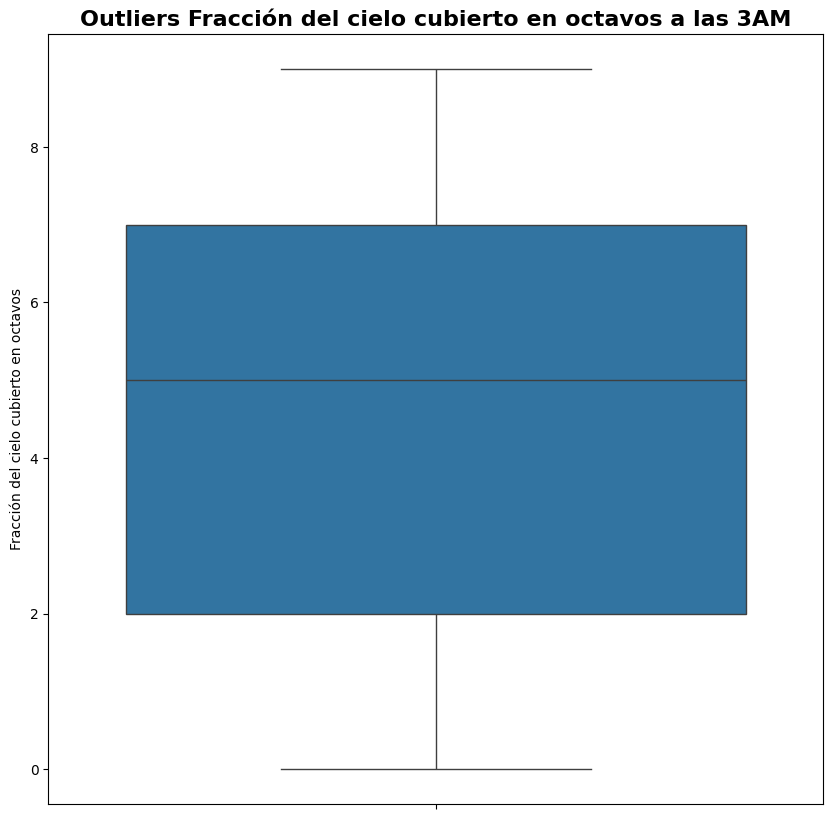

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Cloud3pm,data=data_frame)
plt.ylabel("Fracción del cielo cubierto en octavos")
plt.title("Outliers Fracción del cielo cubierto en octavos a las 3AM",fontsize=16, fontweight="bold")

El gráfico no muestra valores outliers lo cual se procederá a cambiar los valores nulos por el promedio.

In [ ]:
mean = data_frame.Cloud3pm.mean()
print("el promedio es:",mean)
data_frame.Cloud3pm=data_frame.Cloud3pm.fillna(mean)
print("Cantidad de nulos de la columna Cloud3pm: ",data_frame.Cloud3pm.isnull().sum())

el promedio es: 4.503166899728551
Cantidad de nulos de la columna Cloud3pm:  0


###Limpieza variable Temp9am

Text(0.5, 1.0, 'Outliers temperatura en grados celcius a las 9AM')

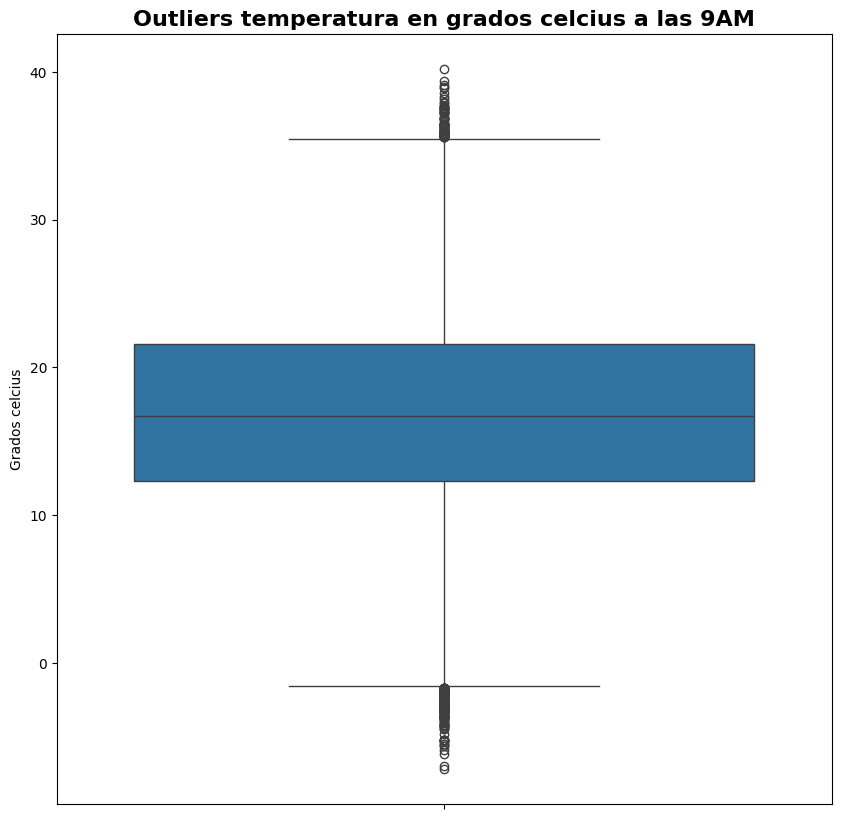

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Temp9am,data=data_frame)
plt.ylabel("Grados celcius")
plt.title("Outliers temperatura en grados celcius a las 9AM",fontsize=16, fontweight="bold")

Como el gráfico muestra valores outliers se procederá a cambiar los valores nulos por el valor de la mediana.

In [ ]:
median = data_frame.Temp9am.median()
print("la mediana es:",median)
data_frame.Temp9am=data_frame.Temp9am.fillna(mean)
print("Cantidad de nulos ahora de la columna Temp9am es: ",data_frame.Temp9am.isnull().sum())

la mediana es: 16.7
Cantidad de nulos ahora de la columna Temp9am es:  0


###Limpieza variable Temp3pm

Text(0.5, 1.0, 'Outliers temperatura en grados celcius a las 3PM')

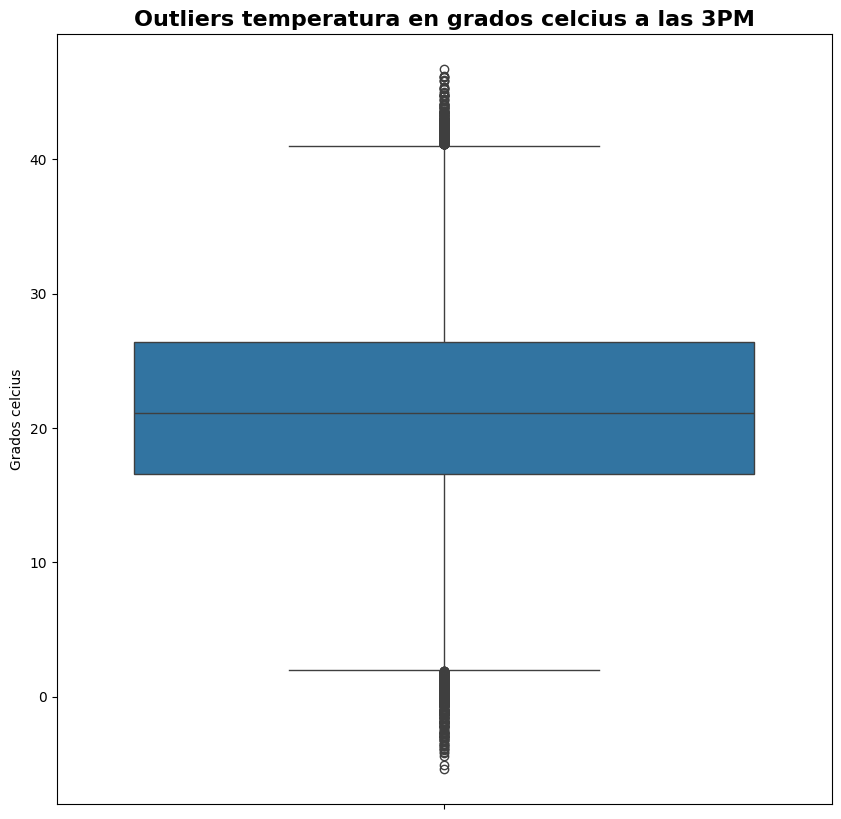

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(y=data_frame.Temp3pm,data=data_frame)
plt.ylabel("Grados celcius")
plt.title("Outliers temperatura en grados celcius a las 3PM",fontsize=16, fontweight="bold")

Como la tabla muestra valores outliers, se procederá a cambiar los valores nulos por el valor de la mediana.

In [ ]:
median = data_frame.Temp3pm.median()
print("la mediana es:",median)
data_frame.Temp3pm=data_frame.Temp3pm.fillna(mean)
print("Cantidad de nulos de la columna Temp3pm: ",data_frame.Temp3pm.isnull().sum())

la mediana es: 21.1
Cantidad de nulos de la columna Temp3pm:  0


###Limpieza RainToday

Como es una variable cualitativa se procederá a cambiar los nulos por la moda

In [ ]:
data_frame.RainToday.describe()

count     140787
unique         2
top           No
freq      109332
Name: RainToday, dtype: object

La moda es No lo cual se procederá a cambiar los valores nulos por el valor de la moda

In [ ]:
moda=data_frame.RainToday.mode()[0]
print("la moda es: ",moda)
data_frame.RainToday=data_frame.RainToday.fillna(str(mode))
print("Cantidad de nulos de la columna RainToday: ",data_frame.RainToday.isnull().sum())

la moda es:  No
Cantidad de nulos de la columna RainToday:  0


###Validación datos nulos

In [ ]:
data_frame.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

##Tranformación de los datos

Para poder crear predicciones, lo primero que realizaremos es obtener los datos de la variable date y obtener el mes en una columna aparte.


Para ver si está la posibilidad de tener correlación entre la temperatura máxima y el mes del año en el que se realizó.

Como la variable Date es tipo object se cambiará el formato a date time

In [ ]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'], format='%Y-%m-%d')

Ahora se creará una nueva columna llamada mes donde extraeremos el mes de la columna Date

In [ ]:
data_frame['Mes']=data_frame['Date'].dt.month

Imprimiremos la tabla para revisar si se realizó exitosamente

In [ ]:
data_frame.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Mes
142188,2017-06-20,Uluru,3.5,21.8,0.0,4.8,7.624853,E,31.0,ESE,...,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,0.0,No,6
142189,2017-06-21,Uluru,2.8,23.4,0.0,4.8,7.624853,E,31.0,SE,...,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,0.0,No,6
142190,2017-06-22,Uluru,3.6,25.3,0.0,4.8,7.624853,NNW,22.0,SE,...,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,0.0,No,6
142191,2017-06-23,Uluru,5.4,26.9,0.0,4.8,7.624853,N,37.0,SE,...,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,0.0,No,6
142192,2017-06-24,Uluru,7.8,27.0,0.0,4.8,7.624853,SE,28.0,SSE,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,0.0,No,6


Ahora se realizará una tranformación en las variables cualitativas para poder ingresarla en los modelos predictivos.

In [ ]:
encoder= LabelEncoder()
data_frame['Location_t'] = encoder.fit_transform(data_frame.Location)
data_frame['windgustdir_t']=encoder.fit_transform(data_frame.WindGustDir)
data_frame['WindDir9am_t']=encoder.fit_transform(data_frame.WindDir9am)
data_frame['WindDir3pm_t']=encoder.fit_transform(data_frame.WindDir3pm)
data_frame['RainToday_t']=encoder.fit_transform(data_frame.RainToday)
data_frame['RainTomorrow_t']=encoder.fit_transform(data_frame.RainTomorrow)

Lo que se realizó en el codigo de arriba, es agregar nuevas columnas y asignarle un valor numérico a cada categoría.

Imprimimos la tabla para validar la tranformación

In [ ]:
data_frame.head(1)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,RainToday,RISK_MM,RainTomorrow,Mes,Location_t,windgustdir_t,WindDir9am_t,WindDir3pm_t,RainToday_t,RainTomorrow_t
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,7.624853,W,44.0,W,...,No,0.0,No,12,2,14,14,15,1,0


# Generación modelos predictivos

## Objetivo de modelo predictivo

El objetivo de nuestros modelos predictivos, es predecir la temperatura máxima, ya que esta información podría ser útil para servicios de emergencia, así poder planificar y/o mitigar un riesgo a un inminente incendio forestal o sequías, o simplemente para informar a los habitantes de cierta localidad y estos estén preparados.

##Análisis de la temperatura máxima con las variables

Antes de empezar con el desarrollo de los modelos predictivos primero veremos cómo se relaciona la variable MaxTemp con las otras variables.

Text(0.5, 1.0, 'Mapa de correlación')

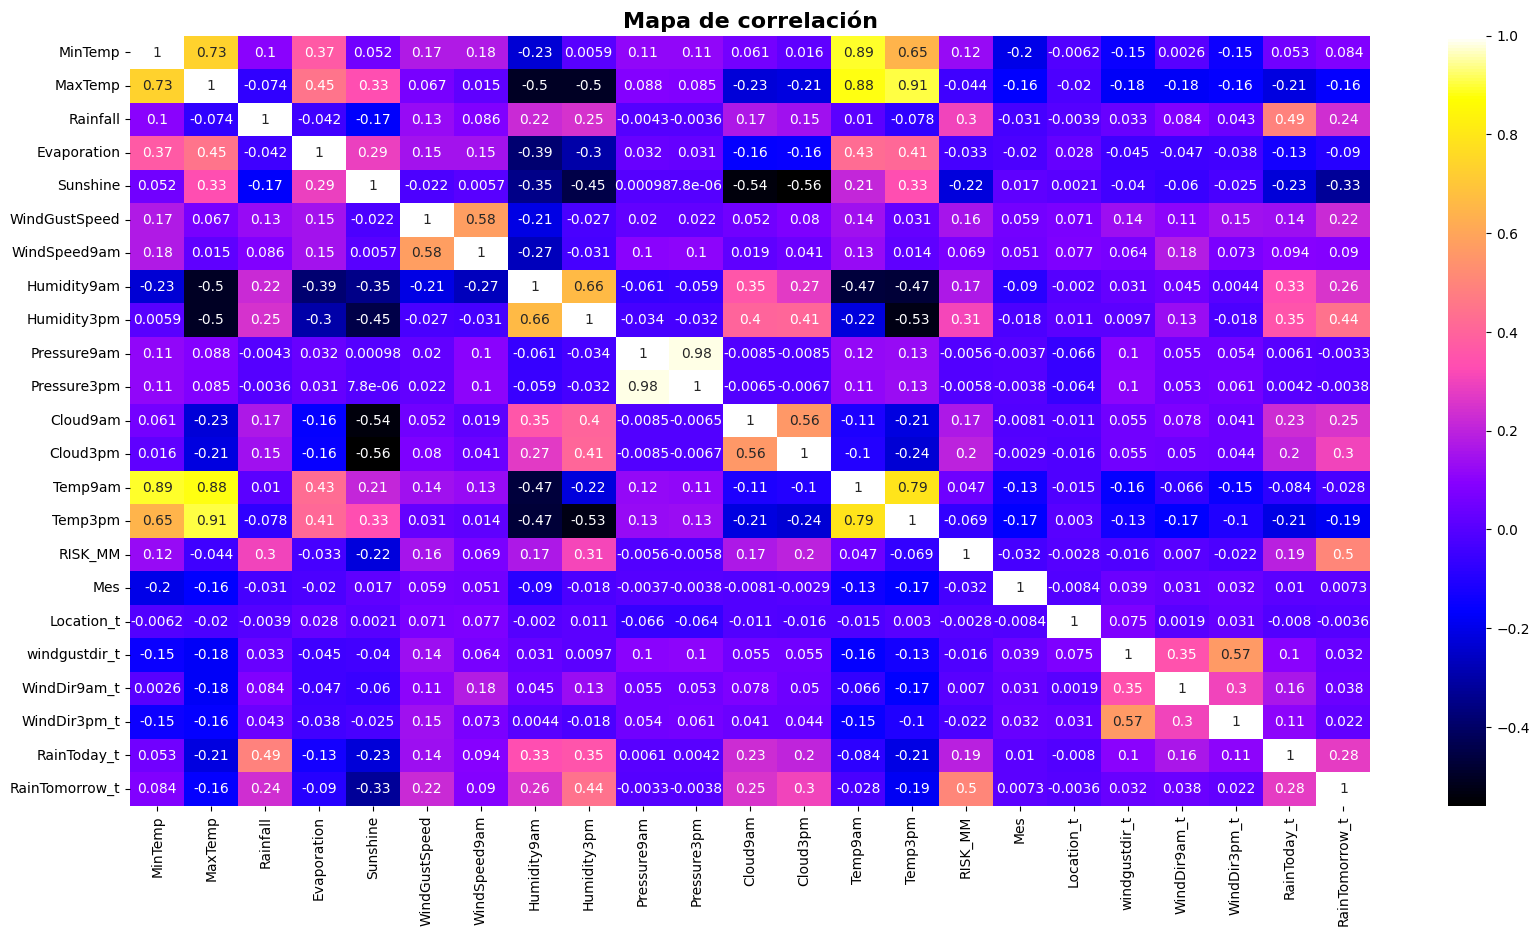

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(20, 10))
ax = sns.heatmap(data_frame.corr(), annot=True, cmap='gnuplot2')
plt.title("Mapa de correlación",fontsize=16, fontweight="bold")

Como se puede visualizar, la temperatura máxima tiene una alta correlación con:
* la temperatura de las 3pm
*la temperatura de las 9am
*la evaporación
*la cantidad de hora que el sol brillo
* Temperatura mínima


Donde la mínima correlación es 0,33, que es la cantidad de horas que el sol brilló.





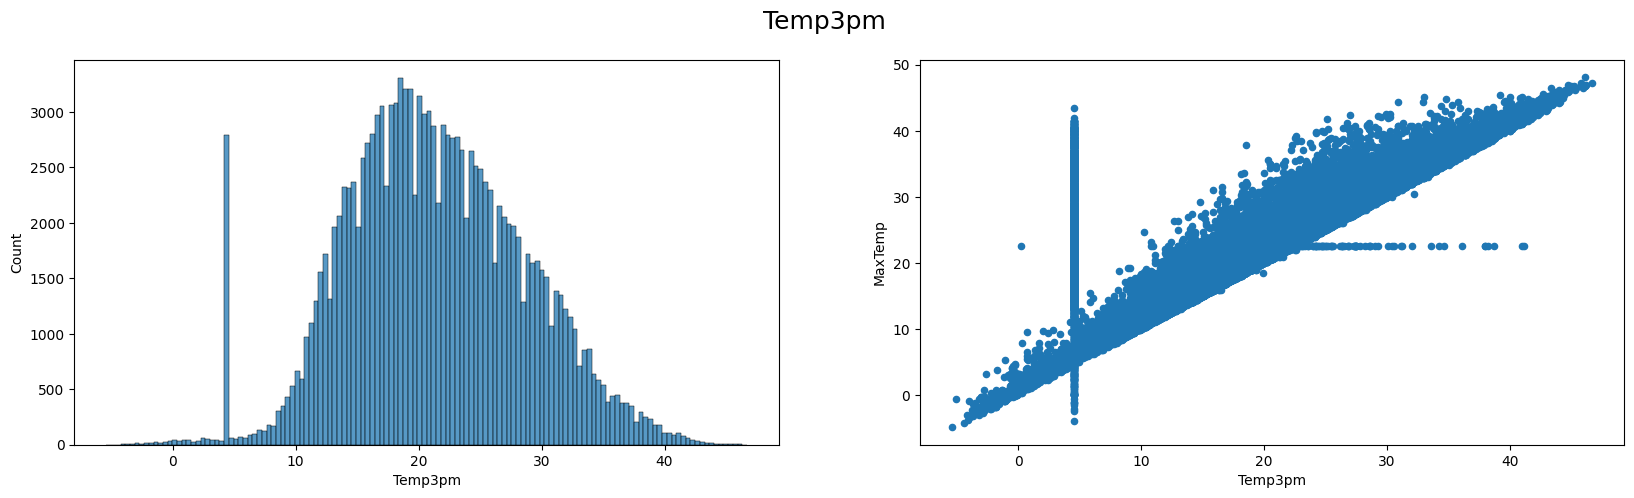

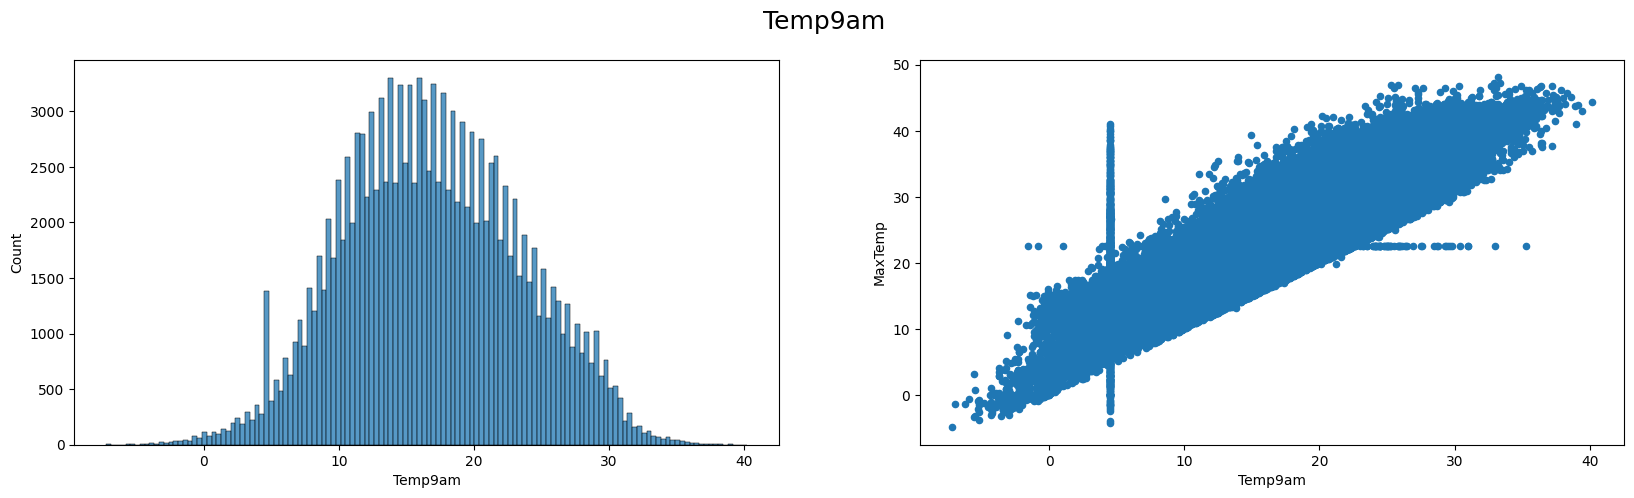

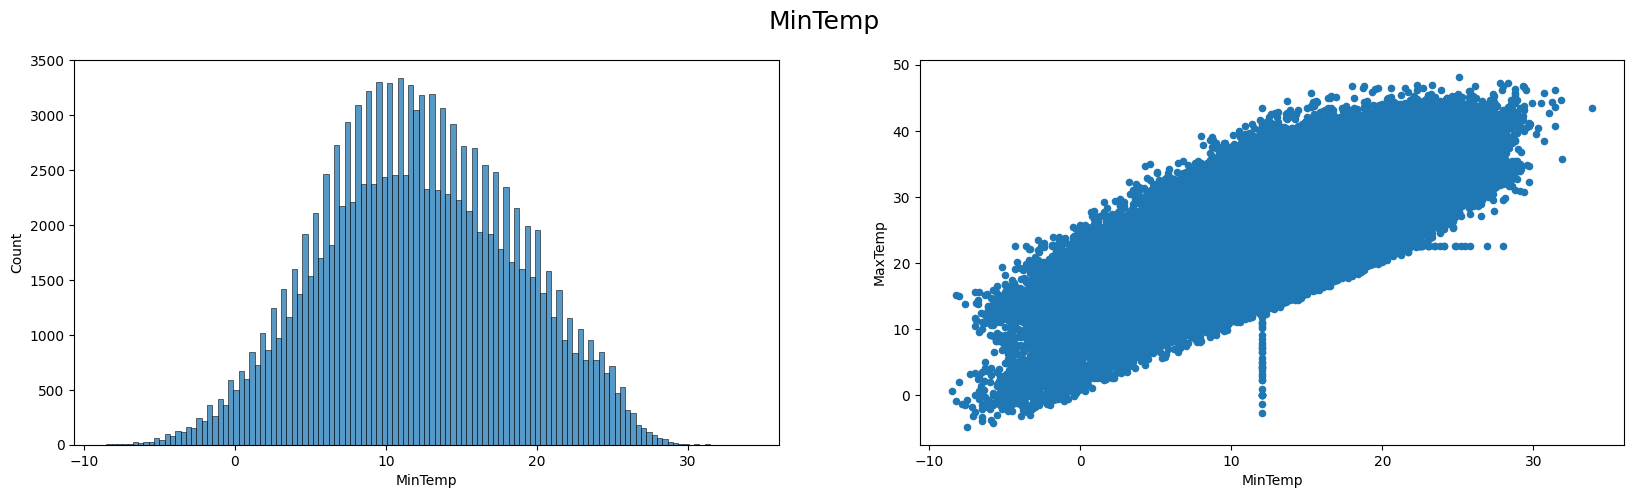

In [ ]:
for col in ['Temp3pm','Temp9am','MinTemp']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(col, fontsize=18)
    sns.histplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['MaxTemp']].plot.scatter(x=col, y='MaxTemp', ax=ax[1])
    plt.show()



1.   En el gráfico Temp3pm muestra una relación entre la temperatura de las 3 PM y la temperatura máxima, donde se puede apreciar que son proporcionales. A mayor temperatura a las 3 pm, mayor va a ser la temperatura máxima durante el dia excluyendo los outlayers.


2.   En el gráfico Temp9am se puede apreciar las mismas observaciones que en el gráfico 1 (Temp3pm).

3. En el gráfico 3 se puede visualizar que, a mayor sea la temperatura mínima, mayor va a ser la temperatura máxima y viceversa.



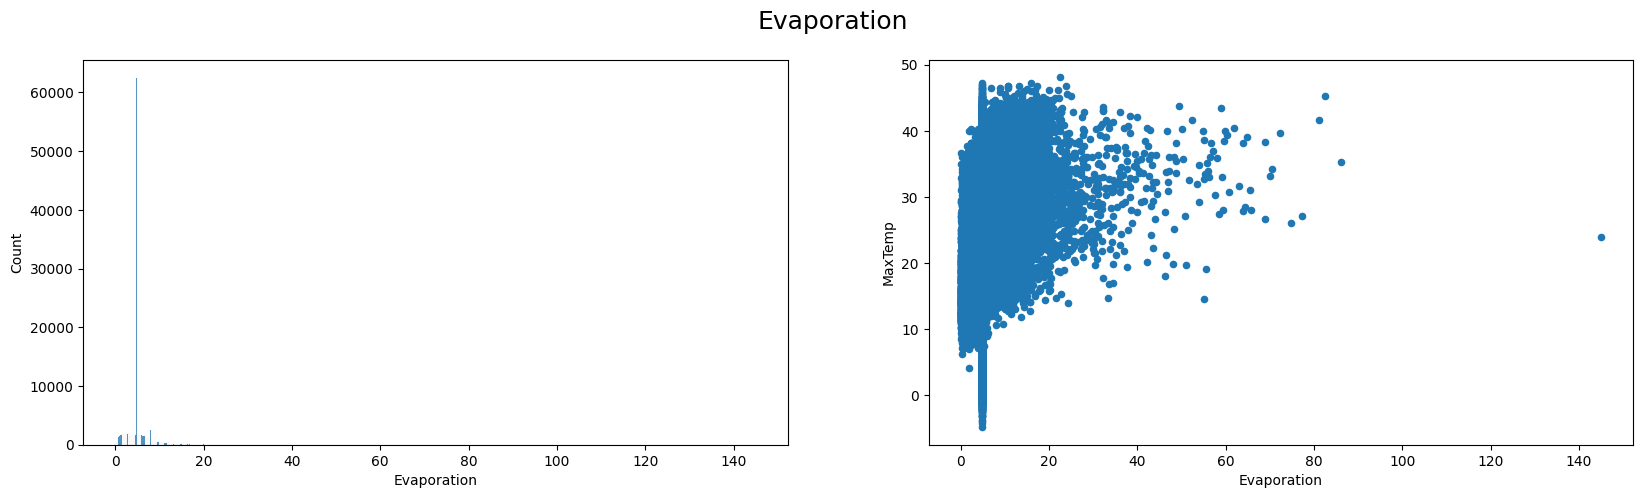

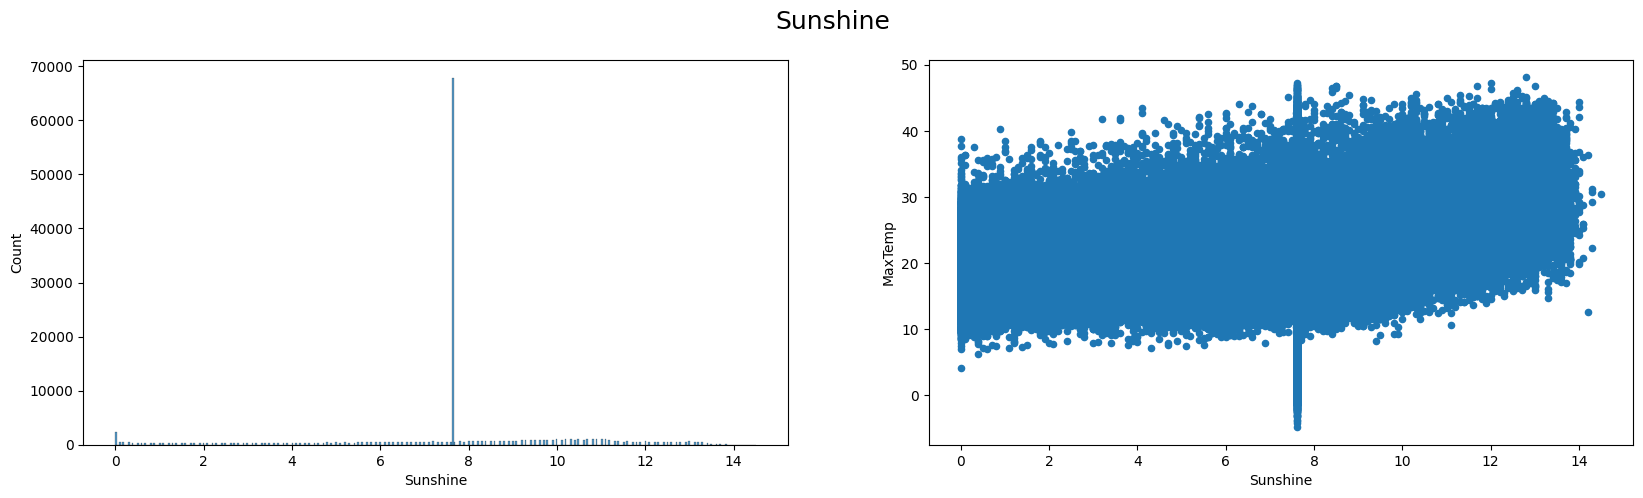

In [ ]:
for col in ['Evaporation','Sunshine']:
    fig, ax =plt.subplots(1, 2, figsize=(20, 5))
    fig.suptitle(col, fontsize=18)
    sns.histplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['MaxTemp']].plot.scatter(x=col, y='MaxTemp', ax=ax[1])
    plt.show()



4.   En el gráfico Evaporación se puede apreciar que hay una relación donde la mayor cantidad de mm de agua evaporada, ocurre cuando la temperatura máxima es mayor a 8°C aproximadamente.

5.   En el gráfico Sunshine o la cantidad de horas que sol brilla, muestra un ligero incremento en la temperatura máxima cuando el sol brilla más horas, entonces podemos concluir son directamente proporcionales.



## Evolución Modelo 1 Regresión lineal

####Primer modelo usando Regresión lineal

Para el primer modelo usaremos fechas del día anterior usaremos las 5 variables que tienen más correlación agregando la temperatura máxima del día anterior

In [ ]:
data_frame_regresion_1=data_frame
data_frame_regresion_1['mintemp_ayer'] = data_frame['MinTemp'].shift(1)
data_frame_regresion_1['maxtemp_ayer'] = data_frame['MaxTemp'].shift(1)
data_frame_regresion_1['evaporation_ayer'] = data_frame['Evaporation'].shift(1)
data_frame_regresion_1['sunshine_ayer'] = data_frame['Sunshine'].shift(1)
data_frame_regresion_1['Temp9am_ayer'] = data_frame['Temp9am'].shift(1)
data_frame_regresion_1['Temp3pm_ayer'] = data_frame['Temp3pm'].shift(1)

En el codigo agregamos

*   La temperatura mínima del día de ayer
*   Máxima temperatura del día de ayer

*   La evaporación del día de ayer

*   Las horas que el sol brillo del día anterior

*   Temperatura de las 9 AM del día anterior

*   La temperatura de las 3 PM del día anterior

En el Data Frame

Revisaremos los nulos, puesto que agregamos nuevos valores, puesto que la fecha más antigua no tendrá registro del día anterior

In [ ]:
data_frame_regresion_1.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
Mes                 0
Location_t          0
windgustdir_t       0
WindDir9am_t        0
WindDir3pm_t        0
RainToday_t         0
RainTomorrow_t      0
mintemp_ayer        1
maxtemp_ayer        1
evaporation_ayer    1
sunshine_ayer       1
Temp9am_ayer        1
Temp3pm_ayer        1
dtype: int64

Como cuenta los nulos vamos hacerle un nueva limpieza de datos

In [ ]:
data_frame_regresion_1.mintemp_ayer=data_frame.mintemp_ayer.fillna(data_frame.MinTemp.median())
data_frame_regresion_1.maxtemp_ayer=data_frame.maxtemp_ayer.fillna(data_frame.MinTemp.median())
data_frame_regresion_1.evaporation_ayer=data_frame.evaporation_ayer.fillna(data_frame.MinTemp.median())
data_frame_regresion_1.sunshine_ayer=data_frame.sunshine_ayer.fillna(data_frame.MinTemp.mean())
data_frame_regresion_1.sunshine_ayer=data_frame.sunshine_ayer.fillna(data_frame.MinTemp.median())
data_frame_regresion_1.Temp9am_ayer=data_frame.Temp9am_ayer.fillna(data_frame.MinTemp.median())
data_frame_regresion_1.Temp3pm_ayer=data_frame.Temp3pm_ayer.fillna(data_frame.MinTemp.median())

Ahora revisaremos denuevo los nulos para corroborar los cambios

In [ ]:
data_frame.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RISK_MM             0
RainTomorrow        0
Mes                 0
Location_t          0
windgustdir_t       0
WindDir9am_t        0
WindDir3pm_t        0
RainToday_t         0
RainTomorrow_t      0
mintemp_ayer        0
maxtemp_ayer        0
evaporation_ayer    0
sunshine_ayer       0
Temp9am_ayer        0
Temp3pm_ayer        0
dtype: int64

Como ya no cuenta con nulos vamos a separar las variables independientes con las variables dependientes para la creación del modelo

**Variables independientes**

In [ ]:
X = data_frame_regresion_1[['mintemp_ayer', 'maxtemp_ayer','evaporation_ayer','sunshine_ayer','Temp9am_ayer','Temp3pm_ayer']]

**Variable dependiente**

In [ ]:
y = data_frame_regresion_1['MaxTemp']

Como tenemos la variable depenendiente e independientes vamos a separar los datos de pruebas y entrenamiento

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


Despues que realizamos la separación de los datos de pruebas que equivale al 20% y de entrenamiento al 80% vamos a empezar con la creación del modelo y entrenamiento

In [ ]:
# Creación de modelo
modelo = LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)
r2_modelo1 = r2_score(y_test, y_pred)

Como el modelo ya está entrenado vamos a ver el porcentaje de certeza

In [ ]:
print("Score del modelo en entrenamiento : %.2f" % modelo.score(X_train, y_train))
print("Score del modelo en test : %.5f" % modelo.score(X_test, y_test))

Score del modelo en entrenamiento : 0.77
Score del modelo en test : 0.76483


El modelo muestra un **76,6%** de certeza en las pruebas y en el entranamiento un **77%** de certeza


In [ ]:
print("R2 : %.5f" % r2_score(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))

R2 : 0.76483
MAE: 2.48


El R2 o coeficiente de determianción muestra que tan ajustado esta el modelo cual muestra 0.76 lo cual esta bien ajustado pero un poco alejado de nuestra meta que es el 0.8 o superior y el MAE o error medio absoluto muestra el promedio de errores de nuestro modelo, podemos observar que aun esta alto, por lo que hay que bajarlo para que pueda estar mas cerca de nuestro objetivo

In [ ]:
print("Coeficientes : ", modelo.coef_)
print("bias = ", modelo.intercept_)

Coeficientes :  [ 0.11208243  0.73691511  0.04270223  0.14504335 -0.02565422  0.05983237]
bias =  2.5754007033981026


* El coeficiente nos muestra el incremento de la unidad para cada variable
* el bias nos muestra el valor esperando cuando todas las variables tienen valor a 0






---

Guardamos los datos para hacer una comparación mas adelante

In [ ]:
history_mae_rl, history_score_rl = [], []
history_mae_rl.append(mean_absolute_error(y_test, y_pred))
history_score_rl.append(r2_score(y_test, y_pred))

####Segundo modelo usando Regresión lineal

Para el segundo modelo vamos a agregarle el promedio de los 7 dias previos

In [ ]:
data_frame_regresion_2=data_frame
data_frame_regresion_2['mintemp_ayer'] = data_frame['MinTemp'].shift(1)
data_frame_regresion_2['evaporation_ayer'] = data_frame['Evaporation'].shift(1)
data_frame_regresion_2['sunshine_ayer'] = data_frame['Sunshine'].shift(1)
data_frame_regresion_2['Temp9am_ayer'] = data_frame['Temp9am'].shift(1)
data_frame_regresion_2['Temp3pm_ayer'] = data_frame['Temp3pm'].shift(1)
data_frame_regresion_2['maxtemp_ayer'] = data_frame['MaxTemp'].shift(1)


Arriba se creo un nuevo data frame agregandole columnas de las 5 variables que tienen mas correlación a nuestra variable maxtemp, como se realizó previamente, pero ahora utilizando la información del dia anterior agregando la temperatura maxima que la utilizaremos puesto que es información de días previos

In [ ]:
data_frame_regresion_2['maxtemp_prom'] = data_frame['MaxTemp'].rolling(7).mean().shift(1)
data_frame_regresion_2['mintemp_prom'] = data_frame['MinTemp'].rolling(7).mean().shift(1)
data_frame_regresion_2['evaporation_prom'] = data_frame['Evaporation'].rolling(7).mean().shift(1)
data_frame_regresion_2['sunshine_prom'] = data_frame['Sunshine'].rolling(7).mean().shift(1)
data_frame_regresion_2['Temp9am_prom'] = data_frame['Temp9am'].rolling(7).mean().shift(1)
data_frame_regresion_2['Temp3pm_prom'] = data_frame['Temp3pm'].rolling(7).mean().shift(1)

Lo que realiza el codigo es agregar nuevas columnas del promedio del dia anterior hasta una semana atras y sacar el promedio de las 6 variables que tienen mas correlación, tambien usamos el promedio de la temperatura maxima de los 7 dias anteriores



---

Ahora vamos a eliminar los valores nulos puesto que algunas fechas no cuentan con datos de dias anteriores o semana anterior

In [ ]:
data_frame_regresion_2.dropna(inplace=True)

Ahora vamos a crear las variables independiente para ingresarlas al modelo y poder entrenarlo


In [ ]:
X = data_frame_regresion_2[['mintemp_ayer','evaporation_ayer','sunshine_ayer','Temp9am_ayer','Temp3pm_ayer','mintemp_prom','sunshine_prom','evaporation_prom',
'Temp9am_prom','Temp3pm_prom','maxtemp_ayer','maxtemp_prom']]

Ahora crearemos la variable dependiente

In [ ]:
y = data_frame_regresion_2['MaxTemp']

Ahora vamos a crear el modelo para poder entrenarlo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)
# Creación de modelo
modelo_2 = LinearRegression()
# Entrenamiento del modelo
modelo_2.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo_2.predict(X_test)
r2 = r2_score(y_test, y_pred)

Ahora imprimimos los resultados

In [ ]:
print("Score del modelo en entrenamiento : %.2f" % modelo_2.score(X_train, y_train))
print("Score del modelo en test : %.5f" % modelo_2.score(X_test, y_test))

Score del modelo en entrenamiento : 0.80
Score del modelo en test : 0.79621


El modelo muestra que en el entrenamiento obtuvo un 0.8 y en el test no alcanzo lo esperado por lo que vamos a tener que seguir trabajando en el modelo

In [ ]:
print("Coeficientes : ", modelo_2.coef_)
print("bias = ", modelo_2.intercept_)

Coeficientes :  [-0.05003726 -0.04334225  0.12663028 -0.10907983  0.24737982  0.042461
 -0.04809823  0.0911345   0.18229987 -0.24745534  0.372654    0.5011423 ]
bias =  0.9380985855551458


* El coeficiente nos muestra el incremento de la unidad para cada variable
* El bias nos muestra el valor esperando cuando todas las variables tienen valor a 0

In [ ]:
print("R2 : %.5f" % r2_score(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))

R2 : 0.79621
MAE: 2.33


El R2 o coeficiente de determianción muestra que tan ajustado esta el modelo, el que muestra 0.79 por ende aumentamos comparado con el modelo anterior y esta bien ajustado al resultado esperado pero un poco alejado de nuestra meta que es el 0.8 o superior y el  MAE o error medio absoluto muestra el promedio de errores de nuestro modelo que aun esta alto por lo que hay que bajarlo para que pueda estar mas cerca de nuestro objetivo



---

Guardamos los datos para hacer una comparación mas adelante


In [ ]:
history_mae_rl.append(mean_absolute_error(y_test, y_pred))
history_score_rl.append(r2_score(y_test, y_pred))

####Tercer modelo usando regresión lineal - Con un rendimiento superior al 80%

Para el tercer modelo al igual que el anterior (Modelo 2), tomaremos las variables y sacaremos el promedio de los 7 días, en esta ocasión, agregaremos algunas variables con las que creemos que el modelo aumenará el porcentaje de acierto.

Estas son las variables que seleccionamos del día anterior

In [ ]:
data_frame_regresion_3=data_frame
data_frame_regresion_3['maxtemp_ayer'] = data_frame['MaxTemp'].shift(1)
data_frame_regresion_3['mintemp_ayer'] = data_frame['MinTemp'].shift(1)
data_frame_regresion_3['evaporation_ayer'] = data_frame['Evaporation'].shift(1)
data_frame_regresion_3['sunshine_ayer'] = data_frame['Sunshine'].shift(1)
data_frame_regresion_3['Temp9am_ayer'] = data_frame['Temp9am'].shift(1)
data_frame_regresion_3['Temp3pm_ayer'] = data_frame['Temp3pm'].shift(1)
data_frame_regresion_3['Pressure9am_ayer'] = data_frame['Pressure9am'].shift(1)
data_frame_regresion_3['Pressure3pm_ayer'] = data_frame['Pressure3pm'].shift(1)
data_frame_regresion_3['WindGustSpeed_ayer'] = data_frame['WindGustSpeed'].shift(1)

Como se puede apreciar, seleccionamos solamente las variables que cuentan con mayor correlación, además de eso, comparado con el modelo anterior, le agregamos las variables de pressure9am y pressure 3pm.

In [ ]:
data_frame_regresion_3['maxtemp_prom'] = data_frame['MaxTemp'].rolling(7).mean().shift(1)
data_frame_regresion_3['mintemp_prom'] = data_frame['MinTemp'].rolling(7).mean().shift(1)
data_frame_regresion_3['evaporation_prom'] = data_frame['Evaporation'].rolling(7).mean().shift(1)
data_frame_regresion_3['sunshine_prom'] = data_frame['Sunshine'].rolling(7).mean().shift(1)
data_frame_regresion_3['Temp9am_prom'] = data_frame['Temp9am'].rolling(7).mean().shift(1)
data_frame_regresion_3['Temp3pm_prom'] = data_frame['Temp3pm'].rolling(7).mean().shift(1)
data_frame_regresion_3['Pressure9am_prom'] = data_frame['Pressure9am'].rolling(7).mean().shift(1)
data_frame_regresion_3['Pressure3pm_prom'] = data_frame['Pressure3pm'].rolling(7).mean().shift(1)
data_frame_regresion_3['WindGustSpeed_prom'] = data_frame['WindGustSpeed'].rolling(7).mean().shift(1)

Lo que hicimos en este caso, fue seleccionar el promedio de 7 días del modelo, para así obtener una data que podamos utilizar, ya que si utilizamos la data del mismo día no tendría sentido realizar una predicción, ya que el tiempo en el que se estaría realizando la predicción sería el mismo día.

In [ ]:
data_frame_regresion_3.isnull().sum()

Date                  0
Location              0
MinTemp               0
MaxTemp               0
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           0
WindGustSpeed         0
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RISK_MM               0
RainTomorrow          0
Mes                   0
Location_t            0
windgustdir_t         0
WindDir9am_t          0
WindDir3pm_t          0
RainToday_t           0
RainTomorrow_t        0
mintemp_ayer          1
maxtemp_ayer          1
evaporation_ayer      1
sunshine_ayer         1
Temp9am_ayer          1
Temp3pm_ayer          1
maxtemp_prom          7
mintemp_prom          7
evaporation_prom      7
sunshine_prom         7
Temp9am_prom    

Ahora analizaremos los nulos, ya que como bien sabemos, seleccionar los datos del día anterior nos dejará índices vacios o nulos

In [ ]:
data_frame_regresion_3.dropna(inplace=True)

Este comando elimina los nulos, ya que para esta solución, seleccionamos la data del dia anterior lo que nos deja sin un índice en nuestro dataframe

In [ ]:
X = data_frame_regresion_3[['maxtemp_ayer','mintemp_ayer','evaporation_ayer','sunshine_ayer','Temp9am_ayer','Temp3pm_ayer','Pressure9am_ayer','Pressure3pm_ayer','mintemp_prom','sunshine_prom','evaporation_prom',
'Temp9am_prom','Temp3pm_prom','Pressure9am_prom','Pressure3pm_prom','maxtemp_prom','Location_t','WindGustSpeed_ayer','WindGustSpeed_prom']]
y = data_frame_regresion_3['MaxTemp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

Creamos las variables dependientes e independientes correspondientes a las columnas previamente agregadas y/o seleccionadas anteriormente

In [ ]:
# Creación de modelo
modelo_3 = LinearRegression()
# Entrenamiento del modelo
modelo_3.fit(X_train, y_train)
y_pred = modelo_3.predict(X_test)
r2 = r2_score(y_test, y_pred)

Creamos el modelo y lo entrenamos con las respetivas variables mencioandas anteriormente

In [ ]:

print("Score del modelo en entrenamiento : %.2f" % modelo_3.score(X_train, y_train))
print("Score del modelo en test : %.5f" % modelo_3.score(X_test, y_test))

Score del modelo en entrenamiento : 0.81
Score del modelo en test : 0.80497


El modelo de entrenamiento presento un 81%, mientras que el modelo en pruebas pressento un 80,4%

In [ ]:
print("Coeficientes : ", modelo_3.coef_)
print("bias = ", modelo_3.intercept_)

Coeficientes :  [ 0.38481862 -0.00187815 -0.00977226  0.12804949 -0.06494389  0.20020767
  0.00128641 -0.00081696  0.00090639 -0.053468    0.0638287   0.13686751
 -0.20557952 -0.00129137  0.00091371  0.49197805  0.00051288 -0.06871316
  0.04807723]
bias =  1.6570809205469317


* El coeficiente nos muestra el incremento de la unidad para cada variable
* El bias nos muestra el valor esperando cuando todas las variables tienen valor a 0

In [ ]:
print("R2 : %.5f" % r2_score(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))

R2 : 0.80497
MAE: 2.29


El R2 o coeficiente de determianción muestra que tan ajustado esta el modelo que muestra 0.80 lo que demuestra que llegamos al objetivo que era llegar a un valor igual o superior a 0.8 y el MAE o error medio absoluto muestra el promedio de errores de nuestro modelo el que aun esta alto por lo que hay que reducirlo para que este pueda estar mas cerca de nuestro objetivo



---
Guardamos los datos para poder compararlo mas adelante (R2 y MSE)


In [ ]:
history_mae_rl.append(mean_absolute_error(y_test, y_pred))
history_score_rl.append(r2_score(y_test, y_pred))

In [ ]:
mejor_modelo=[]
mejor_modelo.append(modelo_3.score(X_test, y_test))

### Resultados y conclusiones de la experimentación - Modelo 1

Validamos el modelo e imprimimos los resultados

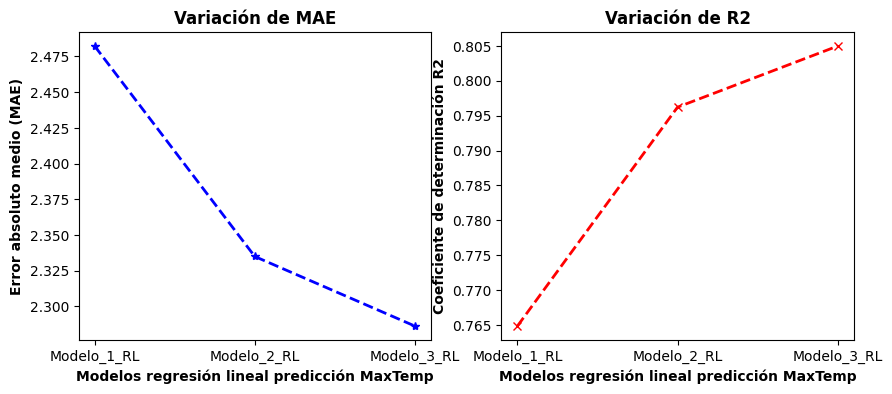

In [ ]:
# Gráficos de experimentación de los modelos
modelos = ['Modelo_1_RL', 'Modelo_2_RL', 'Modelo_3_RL']
fig, axs = plt.subplots(1, 2,figsize=(10,4))
axs[0].plot(modelos, history_mae_rl, 'b*--', linewidth=2)
axs[0].set_xlabel("Modelos regresión lineal predicción MaxTemp", fontsize=10, fontweight="bold")
axs[0].set_ylabel("Error absoluto medio (MAE)", fontsize=10, fontweight="bold")
axs[0].set_title("Variación de MAE", fontsize=12, fontweight="bold")

axs[1].plot(modelos, history_score_rl, 'rx--', linewidth=2, markersize=6)
axs[1].set_xlabel("Modelos regresión lineal predicción MaxTemp", fontsize=10, fontweight="bold")
axs[1].set_ylabel("Coeficiente de determinación R2", fontsize=10, fontweight="bold")
axs[1].set_title("Variación de R2", fontsize=12, fontweight="bold");

El gráfico 1 Representa el MAE o error absoluto medio, entre mas bajo es el valor menos son los errores que presenta el modelo. Lo cual va disminuyendo cada vez que se va progresando en los modelos. En el ultimo modelo muestra un MAE de 2.29, en base a la interpretación de los gráficos se puede apreciar que hay 2.29 grados celcius de error entre el valor real con la predicción.  

El gráfico 2 representa R2, que es el coeficiente de determinación, entre mas alto es el valor, mas ajustado es el modelo, por ende el modelo es mejor, lo que se ve reflejado en el gráfico, como va aumentando a medida que se van creando modelos llegando a la meta de un R2 igual o superior a 0.8

---



Como ya tenemos el modelo con un nivel mayor de certeza vamos asignarles datos nuevos para analizar el resultado

Primero vamos a ingresarle nuevos valores de entrada

In [ ]:
x_maxtemp_ayer = 25.0
x_mintemp_ayer = 15.0
x_evaporation_ayer = 5.0
x_sunshine_ayer = 8.0
x_Temp9am_ayer = 18.0
x_Temp3pm_ayer = 22.0
x_Pressure9am_ayer = 1010.0
x_Pressure3pm_ayer = 1005.0
x_mintemp_prom = 12.0
x_sunshine_prom = 7.0
x_evaporation_prom = 4.0
x_Temp9am_prom = 16.0
x_Temp3pm_prom = 20.0
x_Pressure9am_prom = 1008.0
x_Pressure3pm_prom = 1003.0
x_maxtemp_prom = 26.0
x_Location_t = 1.0
x_WindGustSpeed_ayer = 30.0
x_WindGustSpeed_prom = 35.0

Ahora vamos a realizar las prediccion con los nuevos valores

In [ ]:
X_pred_lineal = np.array([[x_maxtemp_ayer, x_mintemp_ayer, x_evaporation_ayer, x_sunshine_ayer, x_Temp9am_ayer,
                    x_Temp3pm_ayer, x_Pressure9am_ayer, x_Pressure3pm_ayer, x_mintemp_prom, x_sunshine_prom,
                    x_evaporation_prom, x_Temp9am_prom, x_Temp3pm_prom, x_Pressure9am_prom, x_Pressure3pm_prom,
                    x_maxtemp_prom, x_Location_t, x_WindGustSpeed_ayer, x_WindGustSpeed_prom]])

y_pred_new_value = modelo_3.predict(X_pred_lineal)
print("Predicción de temperatura máxima:", y_pred_new_value)

Predicción de temperatura máxima: [25.93691668]


En base las variables de minima temperatura , evaporación , cantidad de hora que el sol brillo , la temperatura de las 9 am , la temperatura a las 3 pm  , la presion atmoferica de las 9 am y las 3 pm del dia anterior y el promedio de los ultimos 7 dias se pudo calcular con el valor asignados a las variables de que la temperatura maxima del dia va estar en los 24 grados celcius

## Evolución Modelo 2 Árbol de desición de regresión

---



### Modelos previos antes de llegar al rendimiento esperado (al menos 1)

####Primer modelo usando Árbol de desición de regresión

In [ ]:
data_frame_arbol_1=data_frame
data_frame_arbol_1['mintemp_ayer'] = data_frame['MinTemp'].shift(1)
data_frame_arbol_1['maxtemp_ayer'] = data_frame['MaxTemp'].shift(1)
data_frame_arbol_1['evaporation_ayer'] = data_frame['Evaporation'].shift(1)
data_frame_arbol_1['sunshine_ayer'] = data_frame['Sunshine'].shift(1)
data_frame_arbol_1['Temp9am_ayer'] = data_frame['Temp9am'].shift(1)
data_frame_arbol_1['Temp3pm_ayer'] = data_frame['Temp3pm'].shift(1)

**Variable independiente**

In [ ]:
data_frame_arbol_1.dropna(inplace=True)

In [ ]:
X = data_frame_arbol_1[['mintemp_ayer', 'maxtemp_ayer','evaporation_ayer','sunshine_ayer','Temp9am_ayer','Temp3pm_ayer']]

**Variable dependiente**

In [ ]:
y = data_frame_arbol_1['MaxTemp']

Ahora realizaremos la separación de los datos de prueba y entrenamiento para probar el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

Ahora empezaremos a realizar el entrenamiento del modelo con una profundidad de 5

In [ ]:
modelo_tree_1 = DecisionTreeRegressor(max_depth = 5, random_state = 29)
modelo_tree_1.fit(X_train, y_train)
y_pred = modelo_tree_1.predict(X_test)

Ahora veremos los resultados

In [ ]:
print("{0:<40} = {1:.4f}".format('Precisión del modelo (en entrenamiento)', modelo_tree_1.score(X_train, y_train)))
print("{0:<40} = {1:.4f}".format('Precisión del modelo (en validación)', modelo_tree_1.score(X_test, y_test)))

Precisión del modelo (en entrenamiento)  = 0.7689
Precisión del modelo (en validación)     = 0.7682


Como muestra los resultados la presición del modelo en el entrenamiento muestra un **76,99%** de certeza en el entrenamiento y un **76,71%** de certeza en las pruebas

Mostraremos una representación grafica del arbol de desición

Profundidad del árbol: 5
Número de nodos terminales: 32


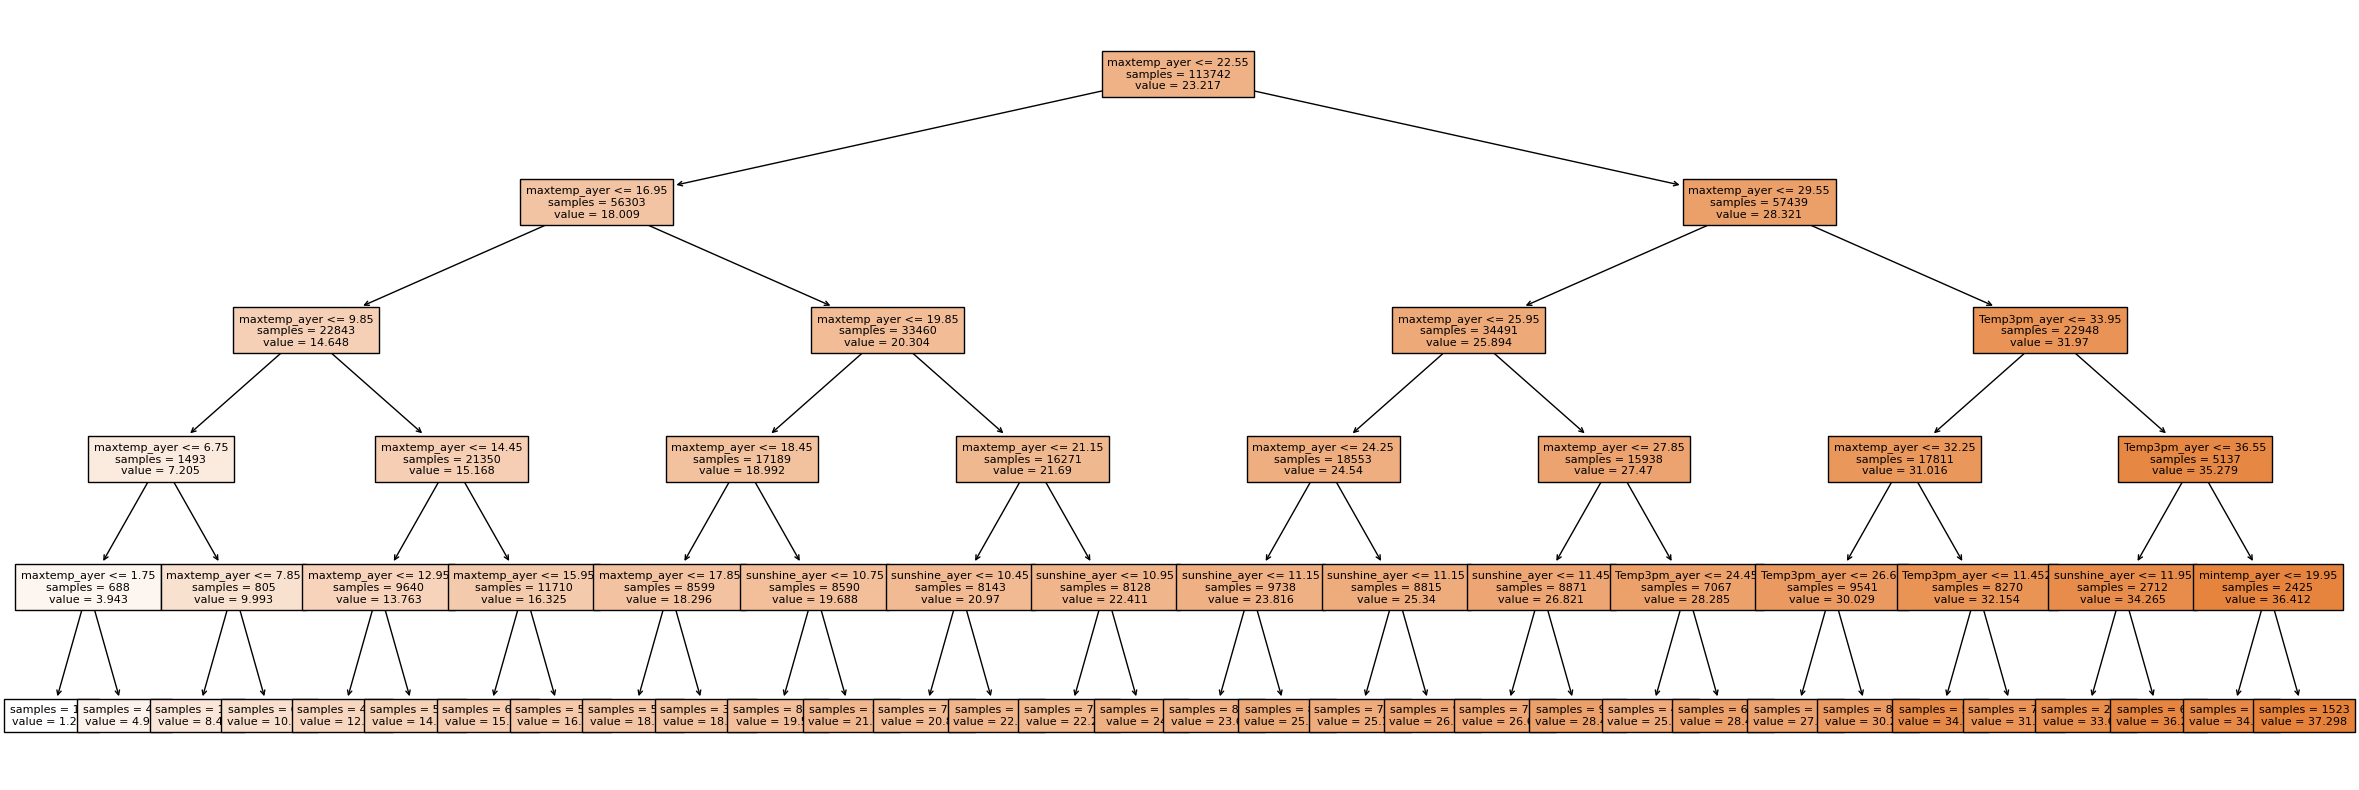

In [ ]:
print(f"Profundidad del árbol: {modelo_tree_1.get_depth()}")
print(f"Número de nodos terminales: {modelo_tree_1.get_n_leaves()}")

fig, ax = plt.subplots(figsize=(30, 10))

plot_tree(
    decision_tree=modelo_tree_1,
    feature_names=X.columns,
    filled=True,
    impurity=False,
    fontsize=8,
    ax=ax
)

plt.show()

El gráfico muestra las decisiones del árbol de decisión mediante el valor de la temperatura máxima pero para hacer mas facil de visualizar y de lectura lo mostraremos via texto en el siguiente codigo:

In [ ]:
print(tree.export_text(modelo_tree_1, feature_names=list(X.columns)))

|--- maxtemp_ayer <= 22.55
|   |--- maxtemp_ayer <= 16.95
|   |   |--- maxtemp_ayer <= 9.85
|   |   |   |--- maxtemp_ayer <= 6.75
|   |   |   |   |--- maxtemp_ayer <= 1.75
|   |   |   |   |   |--- value: [1.28]
|   |   |   |   |--- maxtemp_ayer >  1.75
|   |   |   |   |   |--- value: [5.00]
|   |   |   |--- maxtemp_ayer >  6.75
|   |   |   |   |--- maxtemp_ayer <= 7.85
|   |   |   |   |   |--- value: [8.44]
|   |   |   |   |--- maxtemp_ayer >  7.85
|   |   |   |   |   |--- value: [10.40]
|   |   |--- maxtemp_ayer >  9.85
|   |   |   |--- maxtemp_ayer <= 14.45
|   |   |   |   |--- maxtemp_ayer <= 12.95
|   |   |   |   |   |--- value: [12.93]
|   |   |   |   |--- maxtemp_ayer >  12.95
|   |   |   |   |   |--- value: [14.50]
|   |   |   |--- maxtemp_ayer >  14.45
|   |   |   |   |--- maxtemp_ayer <= 15.95
|   |   |   |   |   |--- value: [15.82]
|   |   |   |   |--- maxtemp_ayer >  15.95
|   |   |   |   |   |--- value: [17.00]
|   |--- maxtemp_ayer >  16.95
|   |   |--- maxtemp_ayer <= 19.

Calculamos R2 y MAE

In [ ]:
print("R2 : %.5f" % r2_score(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))

R2 : 0.76816
MAE: 2.49


El R2 nos muestra que el primer modelo de arbol de decisión de regresión nos  arroja un 0.76 lo que se encuentra alejado de nuestro objetivo puesto que nuestro objetivo es alcanzar un R2 igual o superior a 0.8. El error absoluto nos muestra un valor de 2.49, este valor nos indica el error del valor real con el valor calculado con la predicción, por ende se desvia 2.49 grados celcius que a nuestra consideración es un valor considerable ya que estamos hablando de temperatura.

In [ ]:
history_mae_tree, history_score_tree = [], []
history_mae_tree.append(mean_absolute_error(y_test, y_pred))
history_score_tree.append(r2_score(y_test, y_pred))

Guardamos los resultados para una futura comparación

####Segundo modelo usando Árbol de desición de regresión -con un rendimiento superior al 80%


In [ ]:
data_frame_arbol_2=data_frame
data_frame_arbol_2['maxtemp_ayer'] = data_frame['MaxTemp'].shift(1)
data_frame_arbol_2['mintemp_ayer'] = data_frame['MinTemp'].shift(1)
data_frame_arbol_2['evaporation_ayer'] = data_frame['Evaporation'].shift(1)
data_frame_arbol_2['sunshine_ayer'] = data_frame['Sunshine'].shift(1)
data_frame_arbol_2['Temp9am_ayer'] = data_frame['Temp9am'].shift(1)
data_frame_arbol_2['Temp3pm_ayer'] = data_frame['Temp3pm'].shift(1)
data_frame_arbol_2['Pressure9am_ayer'] = data_frame['Pressure9am'].shift(1)
data_frame_arbol_2['Pressure3pm_ayer'] = data_frame['Pressure3pm'].shift(1)
data_frame_arbol_2['maxtemp_ayer'] = data_frame['MaxTemp'].shift(1)
data_frame_arbol_2['WindGustSpeed_ayer'] = data_frame['WindGustSpeed'].shift(1)


Seleccionamos las variables que contaban con mayor correlación con nuestra variable MaxTemp y, además, agregamos la variable de pressure9am y 3pm y la velocidad del viento

In [ ]:
data_frame_arbol_2['maxtemp_prom'] = data_frame['MaxTemp'].rolling(30).mean().shift(1)
data_frame_arbol_2['mintemp_prom'] = data_frame['MinTemp'].rolling(30).mean().shift(1)
data_frame_arbol_2['evaporation_prom'] = data_frame['Evaporation'].rolling(30).mean().shift(1)
data_frame_arbol_2['sunshine_prom'] = data_frame['Sunshine'].rolling(30).mean().shift(1)
data_frame_arbol_2['Temp9am_prom'] = data_frame['Temp9am'].rolling(30).mean().shift(1)
data_frame_arbol_2['Temp3pm_prom'] = data_frame['Temp3pm'].rolling(30).mean().shift(1)
data_frame_arbol_2['Pressure9am_prom'] = data_frame['Pressure9am'].rolling(30).mean().shift(1)
data_frame_arbol_2['Pressure3pm_prom'] = data_frame['Pressure3pm'].rolling(30).mean().shift(1)
data_frame_arbol_2['WindGustSpeed_prom'] = data_frame['WindGustSpeed'].rolling(30).mean().shift(1)


Utilizamos los promedios de estas variables de los ultimos 30 dias a partir del día anterior

In [ ]:
data_frame_arbol_2.dropna(inplace=True)

Reemplazamos los valores nulos, ya que al obtener la data del día anterior se estaría eliminando un índice

In [ ]:
X = data_frame_arbol_2[['mintemp_ayer','evaporation_ayer','sunshine_ayer','Temp9am_ayer','maxtemp_ayer','Temp3pm_ayer','WindGustSpeed_ayer',
                        'mintemp_prom','sunshine_prom','evaporation_prom','Temp9am_prom','Temp3pm_prom','maxtemp_prom','WindGustSpeed_prom']]
y = data_frame_arbol_2['MaxTemp']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

Creamos las variables dependientes e independientes para luego entrenar el modelo

In [ ]:
modelo_tree_2 = DecisionTreeRegressor(max_depth = 8, random_state = 30)
modelo_tree_2.fit(X_train, y_train)
y_pred = modelo_tree_2.predict(X_test)

Entrenamos el modelo de decisión de regresión lineal con una profundidad máxima de 8 nodos

In [ ]:
print("{0:<40} = {1:.4f}".format('Precisión del modelo (en entrenamiento)', modelo_tree_2.score(X_train, y_train)))
print("{0:<40} = {1:.4f}".format('Precisión del modelo (en validación)', modelo_tree_2.score(X_test, y_test)))

Precisión del modelo (en entrenamiento)  = 0.8170
Precisión del modelo (en validación)     = 0.8112


Verificamos e imprimimos la precisión del modelo, obteniendo el resultado esperado mayor al 80% de precisión.



---

Ahora mostraremos de forma grafica el árbol de desición de regresión

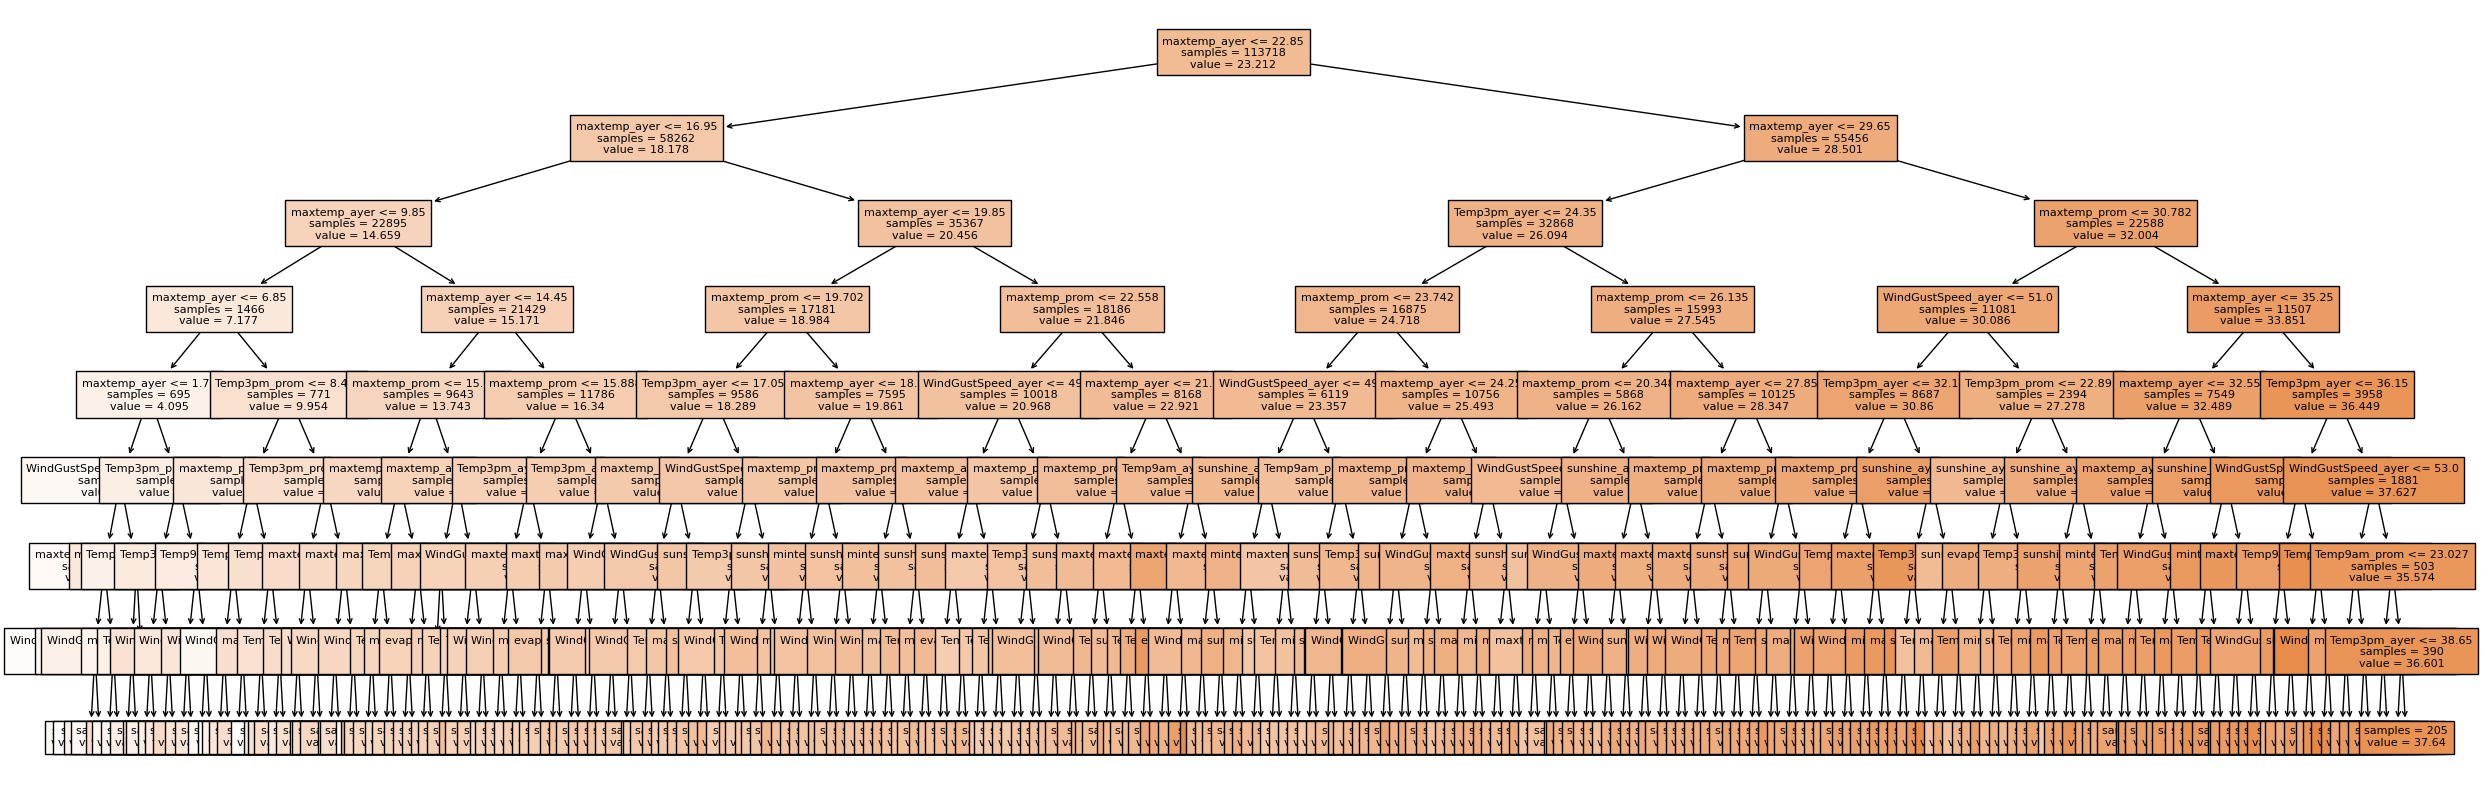

In [ ]:
fig, ax = plt.subplots(figsize=(30, 10))

plot_tree(
    decision_tree=modelo_tree_2,
    feature_names=X.columns,
    filled=True,
    impurity=False,
    fontsize=8,
    ax=ax
)

plt.show()

In [ ]:
print(tree.export_text(modelo_tree_2, feature_names=list(X.columns)))

|--- maxtemp_ayer <= 22.85
|   |--- maxtemp_ayer <= 16.95
|   |   |--- maxtemp_ayer <= 9.85
|   |   |   |--- maxtemp_ayer <= 6.85
|   |   |   |   |--- maxtemp_ayer <= 1.75
|   |   |   |   |   |--- WindGustSpeed_prom <= 59.18
|   |   |   |   |   |   |--- maxtemp_ayer <= -0.05
|   |   |   |   |   |   |   |--- WindGustSpeed_ayer <= 43.50
|   |   |   |   |   |   |   |   |--- value: [1.78]
|   |   |   |   |   |   |   |--- WindGustSpeed_ayer >  43.50
|   |   |   |   |   |   |   |   |--- value: [-0.46]
|   |   |   |   |   |   |--- maxtemp_ayer >  -0.05
|   |   |   |   |   |   |   |--- mintemp_prom <= -2.53
|   |   |   |   |   |   |   |   |--- value: [3.86]
|   |   |   |   |   |   |   |--- mintemp_prom >  -2.53
|   |   |   |   |   |   |   |   |--- value: [1.85]
|   |   |   |   |   |--- WindGustSpeed_prom >  59.18
|   |   |   |   |   |   |--- mintemp_ayer <= 5.10
|   |   |   |   |   |   |   |--- WindGustSpeed_ayer <= 49.00
|   |   |   |   |   |   |   |   |--- value: [10.80]
|   |   |   |   |   

In [ ]:
print("R2 : %.5f" % r2_score(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))

R2 : 0.81117
MAE: 2.24


El R2  de arbol de desición de regresión nos muestra que hay un 0.81 lo que está dentro de nuestro objetivo que consiste en igualar o superar 0.8. También el error absoluto nos muestra un valor de 2.24, por lo que este valor nos indica el error del valor real con el valor calculado con la predicción, lo que quiere decir que se desvia 2.24 grados celcius, que a nuestro parecer es un valor considerable ya que estamos hablando de temperatura, pero un poco menor considerando el modelo anterior.

In [ ]:
history_mae_tree.append(mean_absolute_error(y_test, y_pred))
history_score_tree.append(r2_score(y_test, y_pred))

In [ ]:
mejor_modelo.append(modelo_tree_2.score(X_test, y_test))

Guardamos los datos para un futuro analisis

### Resultados y conclusiones de la experimentación - Modelos arbol de desicion


Para compararlo vamos a comparar los dos modelos en un gráfico en un gráfico

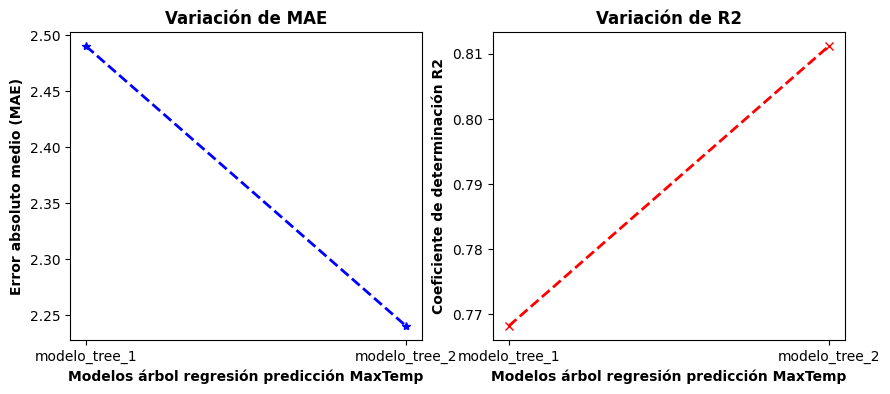

In [ ]:
# Gráficos de experimentación de los modelos
modelos = ['modelo_tree_1', 'modelo_tree_2']
fig, axs = plt.subplots(1, 2,figsize=(10,4))
axs[0].plot(modelos, history_mae_tree, 'b*--', linewidth=2)
axs[0].set_xlabel("Modelos árbol regresión predicción MaxTemp", fontsize=10, fontweight="bold")
axs[0].set_ylabel("Error absoluto medio (MAE)", fontsize=10, fontweight="bold")
axs[0].set_title("Variación de MAE", fontsize=12, fontweight="bold")

axs[1].plot(modelos, history_score_tree, 'rx--', linewidth=2, markersize=6)
axs[1].set_xlabel("Modelos árbol regresión predicción MaxTemp", fontsize=10, fontweight="bold")
axs[1].set_ylabel("Coeficiente de determinación R2", fontsize=10, fontweight="bold")
axs[1].set_title("Variación de R2", fontsize=12, fontweight="bold");

El gráfico 1 nos muestra el MAE en el cual se muestra que bajó considerablemente a 2.24 que es la desviacion promedio en grados celcius del resultado real con la predicción

En el gráfico 2 nos muestra el R2 el cual se puede interpretar como la certeza del modelo, con el que alcanzamos el 80% de certeza y un aumento considerable del modelo 1 y 2



---

Ahora vamos hacer una nueva predicción


In [ ]:
x_mintemp_ayer = 15.0
x_evaporation_ayer = 5.0
x_sunshine_ayer = 8.0
x_Temp9am_ayer = 18.0
x_maxtemp_ayer = 25.0
x_Temp3pm_ayer = 22.0
x_WindGustSpeed_ayer = 30.0
x_mintemp_prom = 12.0
x_sunshine_prom = 7.0
x_evaporation_prom = 4.0
x_Temp9am_prom = 16.0
x_Temp3pm_prom = 20.0
x_maxtemp_prom = 26.0
x_WindGustSpeed_prom = 35.0

In [ ]:
arbol_test_new = [[x_mintemp_ayer, x_evaporation_ayer, x_sunshine_ayer, x_Temp9am_ayer, x_maxtemp_ayer,
                    x_Temp3pm_ayer, x_WindGustSpeed_ayer, x_mintemp_prom, x_sunshine_prom, x_evaporation_prom,
                    x_Temp9am_prom, x_Temp3pm_prom, x_maxtemp_prom, x_WindGustSpeed_prom]]

arbol_y_pred_new = modelo_tree_2.predict(arbol_test_new)
print("Predicción de temperatura máxima:", arbol_y_pred_new)

Predicción de temperatura máxima: [25.5910767]


Con las variables min_temp , evaporación , hora que el sol brillo , temperatura a las 9 am , maxima temperatura, temperatura 3pm del dia anterior y los 30 ultimos dias de los nuevos datos ingresado podemos decir que el dia va a tener un 24.26 grados celcius

# Comparacion de los mejores modelos

Text(0.5, 1.0, 'mejor modelo')

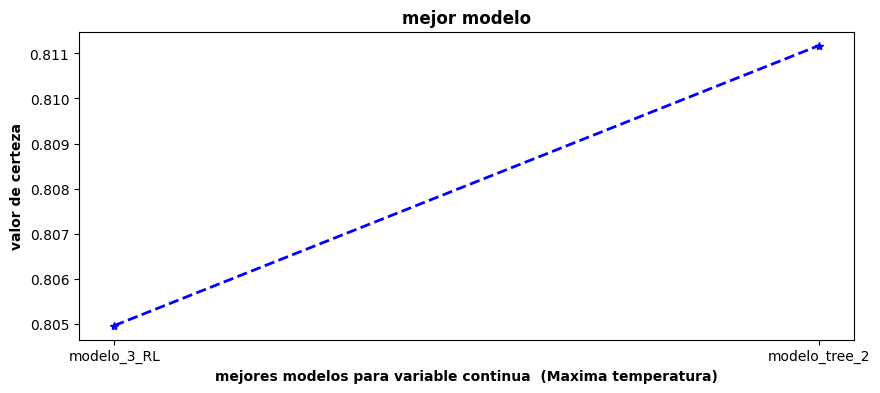

In [ ]:
# Gráficos de experimentación de los modelos
modelos = ['modelo_3_RL', 'modelo_tree_2']
fig, ax = plt.subplots(1,figsize=(10,4))
ax.plot(modelos, mejor_modelo, 'b*--', linewidth=2)
ax.set_xlabel("mejores modelos para variable continua  (Maxima temperatura)", fontsize=10, fontweight="bold")
ax.set_ylabel("valor de certeza", fontsize=10, fontweight="bold")
ax.set_title("mejor modelo", fontsize=12, fontweight="bold")


# Conclusión


Podemos concluir, de todas las investigaciones/pruebas realizadas, que el modelo que mejor rindió, fue la segunda version del **Arbol de desicion**, obteniendo un 81,1% de precision en la prediccion de Max_Temp. Esto lo conseguimos entrenando al modelo con el promedio del mes de las variables con alta correlación con nuestro objetivo, omitiendo los registros del mismo dia. obtuvimos resultados confiables de este modelo que nos permite predecir con precisión la temperatura maxima del dia.

El segundo modelo con el que obtuvimos buenas metricas fue la tercera version de **Regresion logistica**.Este modelo nos arroja una presicion de 80,49%, Esto lo logramos utilizando el promedio semanal de variables que tienen alta correlacion con nuestro objetivo. El modelo nos parece igualmente confiable pero con una menor precision que el modelo de arbol de decisión.

**Por lo que el mejor modelo para la variable MaxTemp fue la segunda version del Arbol de decisión**.



---
Realizaremos una predicción del árbol para mostrar analisis al respecto teniendo en cuenta el objetivo


In [ ]:
x_mintemp_ayer = 20
x_evaporation_ayer = 5
x_sunshine_ayer = 9
x_Temp9am_ayer = 21
x_maxtemp_ayer = 30
x_Temp3pm_ayer = 30
x_WindGustSpeed_ayer = 25
x_mintemp_prom = 19
x_sunshine_prom = 8
x_evaporation_prom = 2
x_Temp9am_prom = 23
x_Temp3pm_prom = 28
x_maxtemp_prom = 33
x_WindGustSpeed_prom = 30
arbol_test_new = [[x_mintemp_ayer, x_evaporation_ayer, x_sunshine_ayer, x_Temp9am_ayer, x_maxtemp_ayer,
                    x_Temp3pm_ayer, x_WindGustSpeed_ayer, x_mintemp_prom, x_sunshine_prom, x_evaporation_prom,
                    x_Temp9am_prom, x_Temp3pm_prom, x_maxtemp_prom, x_WindGustSpeed_prom]]

arbol_y_pred_new = modelo_tree_2.predict(arbol_test_new)
print("Predicción de temperatura máxima:", arbol_y_pred_new)

Predicción de temperatura máxima: [30.92682768]


El resultado nos da 30.92 Grados celcius que es la maxima temperatura de predicción, podemos deducir que si la temperatura es igual o superior a 30°C es posible que suceda un incendio forestal, por ende es recomendable que las autoridades de australia tomen precaución y se preparen de ante mano por la posibilidad de que pueda ocurrir un incendio forestal ocasionado de forma natural. También tener en consideración el MAE 2.24, lo que podria causar que la temperatura ascienda a 33,15 °C puesto que es la deviación promedio del MAE o descender a 28.62°C, que a pesar que sea inferior igual hay posibilidades de que ocurra un incendio forestal o una gran propagación de estos.

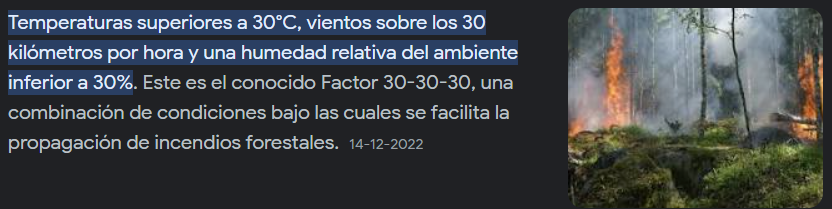


Este análisis fue basado en investigación de las condiciones óptimas para que ocurran incendios, en el cual no se tomo en cuenta la humedad puesto que no es un dato relevante para la predicción de la temperatura máxima, pero la predicción de esta variable, nos ayuda a tener en cuenta unos de los factores importantes para prevenir incendios forestales. Esto es solo una de las aplicaciones que se les podria dar a nuestro modelo de predicción.